
<div style="text-align: center; color: white; background-color: #559cff; font-weight: bold; padding: 20px" >
 <p style="font-size: 40px"> Midterm Project - Phân tích dữ liệu thông minh 📊</p>
 <p style="font-size: 30px"><u>Topic: Analysis of Factors Influencing COVID-19 in USA 🕵️</u></p>

</div>


---

# Thông tin nhóm 👬
| Họ tên              |MSSV       |
|-------------------|----------|
| Đinh Hoàng Duy     | 21127027 |
| Trần Đình Quang     | 21127406 |
| Nguyễn Khánh Nhân | 21127657         |
| Trần Thuận Phát | 21127666         |

# Mức độ đóng góp

| Họ tên              | Tỉ lệ đóng góp       |
|-------------------|----------------------|
| Đinh Hoàng Duy     | 100% |
| Trần Đình Quang     | 100% |
| Nguyễn Khánh Nhân | 100%         |
| Trần Thuận Phát | 100%        |

# Mục lục 📑



---

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

# !pip install geopandas
import geopandas as gpd

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Bài phân tích 📊

### 1. Giới thiệu vấn đề

- Đại dịch bệnh `Coronavirus Disease 2019 (COVID-19)` đã gây ra hậu quả nghiêm trọng trên khắp nước Mỹ và trên toàn thế giới. Các ca nhiễm đầu tiên của virus này được phát hiện tại `Vũ Hán, Trung Quốc`, và hàng triệu người trên toàn thế giới đã tử vong vì căn bệnh này. Tỷ lệ lây nhiễm COVID-19 ngày càng gia tăng tại Mỹ, cùng với tỷ lệ tử vong cao, đã thúc đẩy các nhà lãnh đạo phải xây dựng các biện pháp can thiệp không dựa trên dược phẩm (NPIs) nhằm kiềm chế sự lây lan của dịch bệnh. Các biện pháp NPIs này bao gồm cách ly và kiểm dịch, giãn cách xã hội, khẩu trang và vệ sinh tay. Tại một quốc gia như Mỹ, nơi tập trung đa dạng chủng tộc và quyền con người được coi trọng cao, thì việc thực thi các chính sách y tế hạn chế để kiểm soát sự lây lan của virus đã trở thành một nhiệm vụ thách thức. Điều này có thể được quy cho sự đa dạng về các thiên hướng chính trị, tình trạng kinh tế-xã hội.
- Ngoài việc áp dụng các NPIs, một số chính sách khác cũng đã được thực thi để kiềm chế sự lây lan của virus. Các chính sách này bao gồm đóng cửa các nhà hàng và quán bar, học tập trực tuyến tại các trường học, phong tỏa, giới nghiêm và khuyến cáo hạn chế di chuyển. Theo chỉ đạo của chính phủ liên bang, những chính sách này đã được thực thi dựa trên quyền quyết định của chính quyền tiểu bang. Các nghiên cứu trước đây đã khảo sát hiệu quả của một số chính sách này đối với tỷ lệ lây nhiễm và số ca tử vong.
- Tại Mỹ, người da màu (POC), đặc biệt là người da đen, đang tử vong với tỷ lệ cao hơn so với người da trắng. Lý do cho tỷ lệ cao hơn này là do các người da màu thường làm các nghề nghiệp thiết yếu như nhân viên siêu thị bán lẻ, nhân viên giao thông công cộng, nhân viên chăm sóc sức khỏe và nhân viên vệ sinh. Những loại công việc này không luôn tuân thủ các biện pháp giãn cách xã hội, làm tăng khả năng lây nhiễm cho những người lao động. Một tác động khác đến tỷ lệ tử vong tương đối là thiếu bảo hiểm y tế trong cộng đồng POC. Việc thiếu bảo hiểm làm giảm khả năng những người bị bệnh đi bệnh viện do lo ngại không thể trang trải được chi phí chăm sóc. Do POC, đặc biệt là người da đen, có nhiều khả năng mắc các bệnh nền như tiểu đường, cao huyết áp và bệnh tim, nguy cơ tử vong do COVID-19 cao hơn đáng kể so với mức trung bình quốc gia.
- Đóng góp chính của bài phân tích này là định lượng sự chênh lệch về chủng tộc của COVID-19 đối với các ca dương tính và tử vong trên toàn Mỹ và lãnh thổ, cả riêng lẻ và tổng thể. Điều này bao gồm một cuộc điều tra về các chính sách đã được các tiểu bang thực hiện. </br>

**Mục đích của bài phân tích**: Mỹ là một trong những quốc gia chịu ảnh hưởng nặng nề bởi dịch bệnh COVID-19 nguyên nhân có thể đến từ nhiều yếu tố khác nhau như chính sách, chủng tộc, vị trí địa lý, v.v  chính bởi vì đây là một đất nước lớn, đa dạng và phức tạp cả về xã hội, chính trị lẫn kinh tế. Bài phân tích này sẽ tập trung vào việc phân tích các yếu tố ảnh hưởng đến dịch bệnh COVID-19 tại Mỹ, qua đó đưa ra những kết luận, nhận định về nhung yếu tố ảnh hưởng lớn đến dịch bệnh này. Cuối cùng bài phân tích này sẽ kiểm định 3 giả thuyết chính liên quan đến dịch bệnh COVID-19 tại Mỹ:
- `Giả thuyết thứ nhất` điều tra xem liệu số ca nhiễm và tỷ lệ tử vong của nhóm dân tộc có màu da (POC) có cao hơn nhóm dân tộc Da Trắng hay không?
- `Giả thuyết thứ hai` nghiên cứu xem liệu có sự khác biệt đáng kể về số ca nhiễm xác nhận và tỷ lệ tử vong giữa các nhóm dân tộc trên khắp Hoa Kỳ và lãnh thổ hay không?
- `Giả thuyết thứ ba` điều tra xem liệu sự kiểm soát của đảng chính trị và các chính sách chính phủ có ảnh hưởng đến tỷ lệ ca nhiễm và tử vong giữa các nhóm dân tộc hay không?
- `Giả thuyết thứ tư` điều tra xem liệu mật độ dân cư và các yếu tố con người khác của mỗi bang có phải là yếu tố ảnh hưởng lớn đến số ca nhiễm và tỷ lệ tử vong không?

### 2. Mô tả dữ liệu

Bài phân tích này sẽ kết hợp sử dụng 2 tập dữ liệu chính:
##### 2.1. COVID Racial Data Tracker
- `CRDT_Data.csv`: hay còn được gọi là [COVID Racial Data Tracker](https://covidtracking.com/race). Tập dữ liệu Theo dõi Dữ liệu Chủng tộc COVID (CRDT) được chia thành bốn danh mục:
    - Số ca nhiễm bao gồm các ca nhiễm COVID-19 được xác nhận và có khả năng nhiễm.
    - Số ca tử vong bao gồm các ca tử vong do COVID-19 được xác nhận và có khả năng xảy ra.
    - Số ca nhập viện bao gồm những người đã được nhập viện do COVID-19.
    - Số xét nghiệm bao gồm tổng số xét nghiệm (cả dương tính và âm tính) được thực hiện để chẩn đoán COVID-19.
- Mỗi danh mục đều có thông tin về ngày và bang, và 14 chủng tộc được phân chia thành 12 nhóm dân tộc: người da trắng, người da đen, người Latinh, người Á châu, người Da đỏ và người Bản địa Alaska (AIAN), người Hawaii bản địa và người Đảo Thái Bình Dương (NHPI), Đa chủng tộc, Khác, Không rõ, Gốc Tây Ban Nha, Không phải Gốc Tây Ban Nha và Không rõ Gốc.
- Bài phân tích chỉ này tập trung vào **6** nhóm dân tộc đầu tiên vì nền tảng sắc tộc của họ đã được xác nhận đầy đủ, và dữ liệu về số ca nhiễm và số ca tử vong của từng nhóm dân tộc được đánh giá. Các nhóm dân tộc khác, số ca nhập viện và số xét nghiệm đã bị bỏ qua vì nghiên cứu này tập trung vào số ca nhiễm và số ca tử vong thay vì tổng số ca nhập viện và xét nghiệm. 
- Dữ liệu ghi nhận số ca dương tính, tử vong, nhập viện và test được thực hiện tại từng bang của Mỹ, từ ngày 12/4/2020 đế ngày 7/3/2021. Có tổng cộng 5320 dòng và 54 cột trong tập dữ liệu này.
- Dù có tận 54 cột nhưng thực chất chỉ có 6 nhóm cột chính cần quan tâm là `Date`, `State`, `Cases`, `Deaths`, `Hosp` và `Tests`.

| Cột              | Ý nghĩa      |
|-------------------|----------------------|
| `Date`     | Ngày ghi nhận |
| `State`     | Tên tiểu bang |
| `Cases_*` | Tổng số ca dương tính ghi nhận trong ngày cho từng nhóm người thuộc các chủng tộc khác nhau. `*` ở đây có thể là `White`, `Black`,...          |
| `Deaths_*` | Tổng số ca chết ghi nhận trong ngày cho từng nhóm người thuộc các chủng tộc khác nhau. `*` ở đây có thể là `White`, `Black`,...        |
| `Hosp_*` | Tổng số ca nhập viện ghi nhận trong ngày cho từng nhóm người thuộc các chủng tộc khác nhau. `*` ở đây có thể là `White`, `Black`,...        |
| `Tests_*` | Tổng số ca test ghi nhận trong ngày cho từng nhóm người thuộc các chủng tộc khác nhau. `*` ở đây có thể là `White`, `Black`,...        |
##### 2.2. COVID-19 US State Policy Database   
- `Policies_Social_COVID_19.xlsx`: Tập dữ liệu này được thu thập từ [COVID-19 US State Policy Database](https://github.com/USCOVIDpolicy/COVID-19-US-State-Policy-Database), chứa thông tin về các chính sách xã hội liên quan đến COVID-19 đã được các tiểu bang thực hiện. Các chính sách này bao gồm đóng cửa các nhà hàng và quán bar, học tập trực tuyến tại các trường học, phong tỏa, giới nghiêm và khuyến cáo hạn chế di chuyển. Cụ thể, tập dữ liệu này chứa thông tin về ngày thực thi, ngày kết thúc các chính sách do tất cả các tiểu bang thực hiện trong giai đoạn xảy ra COVID-19. Cuối cùng còn có thông tin về tình hình xã hội của các tiểu bang này như mật độ dân số,  tỉ lệ người vô gia cư, số lượng các chuyên gia dinh dưỡng ở mỗi bang.
- Bộ dữ liệu có tổng cộng 50 dòng và 15 cột:

| Cột              | Ý nghĩa      |
|-------------------|----------------------|
| `STATE`     | Tên tiểu bang |
| `POSTCODE`     | mã bưu chính của tiểu bang |
| `FIPS` | Mã số FIPS của tiểu bang |
| `FM_ALL`| Ngày thực thi chính sách bắt buộc đeo khẩu trang ở nơi công cộng |
| `FM_END` | Ngày kết thúc chính sách bắt buộc đeo khẩu trang ở nơi công cộng |
| `CLREST` | Ngày thực thi chính sách đóng cửa nhà hàng và chỉ cho mua đem về |
| `ENDREST` | Ngày cho phép nhà hàng phục vụ mở cửa trở lại |
| `CLMOVIE` | Ngày thực thi chính sách đóng cửa rạp chiếu phim |
| `END_MOV` | Ngày cho phép rạp chiếu phim mở cửa trở lại |
| `CLOSEBAR` | Ngày thực thi chính sách đóng cửa quán bar |
| `END_BRS` | Ngày cho phép quán bar mở cửa trở lại |
| `POPDEN21` | Mật độ dân số của bang năm 2021|
| `HMLS21` | Số lượng người vô gia cư của bang năm 2021|
| `MH21` | Số lượng các chuyên gia dinh dưỡng trung bình có trong 100 000 người ở mỗi bang năm 2021|


### 3. Tổng quan tình hình COVID-19 tại Mỹ

Trước khi đi sâu hơn vào việc phân tích các yếu tố ảnh hưởng đến dịch bệnh COVID-19 tại Mỹ, chúng ta sẽ xem xét tổng quan về tình hình dịch bệnh tại Mỹ trong xuyên suốt từ tháng 4/2020 đến tháng 3/2021. 

Đầu tiên cần xử lí dữ liệu để dễ dàng phân tích và trực quan hóa dữ liệu. Cụ thể cần xử lí cột `Date` để chuyển về định dạng datetime, sau đó sắp xếp dữ liệu theo thời gian để dễ dàng theo dõi sự thay đổi của dịch bệnh qua từng ngày.

In [3]:
selected_cols = ['Date', 'State', 'Cases_Total', 'Deaths_Total']
CRDT_df = pd.read_csv('CRDT_Data.csv')[selected_cols]

In [4]:
# tách cột Date thành 3 cột: Year, Month, Day
CRDT_df['Date'] = CRDT_df['Date'].astype(str)
CRDT_df['Year'] = CRDT_df['Date'].str[:4].astype(int)
CRDT_df['Month'] = CRDT_df['Date'].str[4:6].astype(int)
CRDT_df['Day'] = CRDT_df['Date'].str[6:].astype(int)

CRDT_df.drop('Date', axis=1, inplace=True)

CRDT_df.head()


,State,Cases_Total,Deaths_Total,Year,Month,Day
0,AK,59332.0,305.0,2021,3,7
1,AL,499819.0,10148.0,2021,3,7
2,AR,324818.0,5319.0,2021,3,7
3,AS,NaN,NaN,2021,3,7
4,AZ,826454.0,16328.0,2021,3,7


Có rất nhiều giá trị `NaN` trong tập dữ liệu vì có những ngày mà không có thông tin về số ca nhiễm, số ca tử vong, số ca nhập viện và số ca test. Để xử lí vấn đề này, chúng ta sẽ thay thế giá trị `NaN` bằng giá trị 0.

In [5]:
# Thay thế các giá trị NaN bằng 0
CRDT_df.fillna(0, inplace=True)
CRDT_df.isna().sum()

State           0
Cases_Total     0
Deaths_Total    0
Year            0
Month           0
Day             0
dtype: int64

Thực hiện trực quan hóa dữ liệu để xem tình hình số ca nhiễm và số ca tử vong tại Mỹ qua từng tháng từ tháng 4/2020 đến tháng 3/2021.

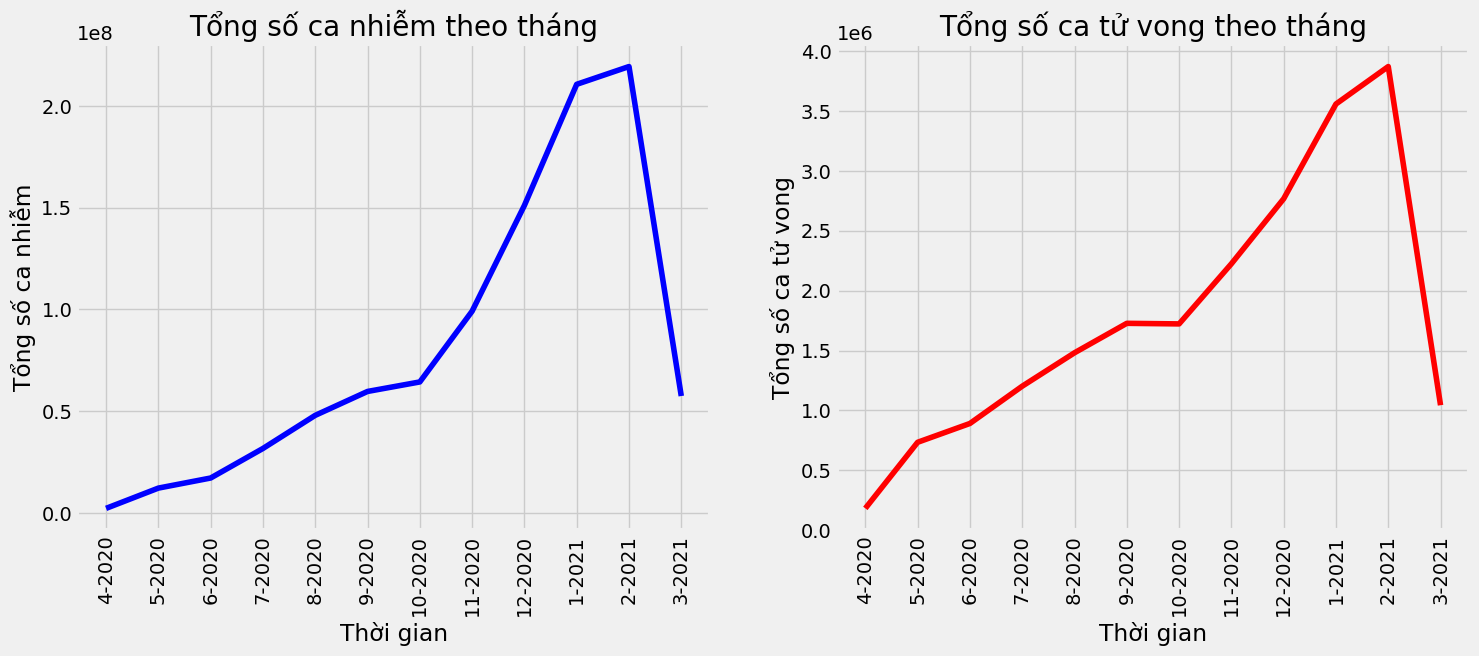

In [6]:
# Tạo DataFrame mới chứa tổng số ca nhiễm và tử vong theo tháng
monthly_df = CRDT_df.groupby(['Month', 'Year'])[['Cases_Total', 'Deaths_Total']].sum().reset_index()
monthly_df['Date'] = monthly_df['Month'].astype(str) + '-' + monthly_df['Year'].astype(str)
monthly_df.sort_values('Year', inplace=True)
# Tạo biểu đồ
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.lineplot(x='Date', y='Cases_Total', data=monthly_df, ax=ax[0], color='blue')
sns.lineplot(x='Date', y='Deaths_Total', data=monthly_df, ax=ax[1], color='red')
# Xác dịnh các giá trị trên trục x
ax[0].set_xticks(range(len(monthly_df)))
ax[0].set_xticklabels(monthly_df['Date'], rotation=90)
ax[1].set_xticks(range(len(monthly_df)))
ax[1].set_xticklabels(monthly_df['Date'], rotation=90)
# Đặt tiêu đề cho biểu đồ và các trục
ax[0].set_xlabel('Thời gian')
ax[1].set_xlabel('Thời gian')
ax[0].set_ylabel('Tổng số ca nhiễm')
ax[1].set_ylabel('Tổng số ca tử vong')
ax[0].set_title('Tổng số ca nhiễm theo tháng')
ax[1].set_title('Tổng số ca tử vong theo tháng')
plt.show()

**Nhận xét**:
- Quan sát 2 biểu đồ trên, ta thấy rằng số ca nhiễm và số ca tử vong có điểm tương đồng rất lớn với nhau (nếu không muốn nói là y hệt nhau), cụ thể là đều tăng mạnh từ tháng 4/2020 đến sang năm 2021, đạt đỉnh điểm vào tháng 2 năm 2021, tuy nhiên sau đó lại giảm rất mạnh ở tháng 3/2021 (giảm đi gấp 4 lần so với tháng 2/2021). Điều này cho thấy rằng dịch bệnh COVID-19 đã gây ra hậu quả nghiêm trọng tại Mỹ trong giai đoạn từ tháng 4/2020 đến tháng 2/2021, sau đó đã giảm đi rất nhiều chỉ trong vòng 1 tháng cho thấy việc kiểm soát dịch bệnh tại Mỹ bằng nhiều biện pháp khác nhau đã được áp dụng một cách nghiêm ngặt và hiệu quả.
- Một điều đáng chú ý là Mỹ có thể làm rất tốt trong việc kiểm soát dịch bệnh, cụ thể là số ca nhiễm và tử vong giảm đi rất nhanh chỉ trong vòng 1 tháng, tuy nhiên họ lại thực hiện việc này quá muộn, mãi đến tận 1 năm sau khi dịch bệnh bùng phát mới thực hiện các biện pháp phòng chống dịch bệnh một cách nghiêm ngặt và hiệu quả.
- Cuối cùng là sự giảm đi rất nhanh của số ca nhiễm và tử vong vào tháng 3/2021 cho thấy rằng việc kiểm soát dịch bệnh tại Mỹ đã đạt được kết quả tốt, tuy nhiên nguyên nhân đằng sau sự giảm này là do việc tiêm vắc xin COVID-19 đã được triển khai rộng rãi tại Mỹ, giúp giảm nguy cơ lây nhiễm và tử vong do COVID-19. Theo [Cơ quan Quản lý Thực phẩm và Dược phẩm Hoa Kỳ (FDA)](https://www.fda.gov/news-events/press-announcements/fda-approves-first-covid-19-vaccine) thì mũi tiêm vắc xin đầu tiên đã được phê duyệt vào ngày 11/12/2020, và sau đó đã được triển khai rộng rãi tại Mỹ, giúp giảm nguy cơ lây nhiễm và tử vong do COVID-19. Vì vậy rất có thể rằng sự giảm mạnh của số ca nhiễm và tử vong vào tháng 3/2021 là do việc tiêm vắc xin COVID-19 đã được triển khai rộng rãi tại Mỹ từ tháng 12/2020.

Sau khi quan sát tổng quan tình hình dịch bệnh tại Mỹ, chúng ta sẽ tiếp tục đi sâu hơn về tình hình dịch bệnh tại Mỹ qua các tiểu bang.

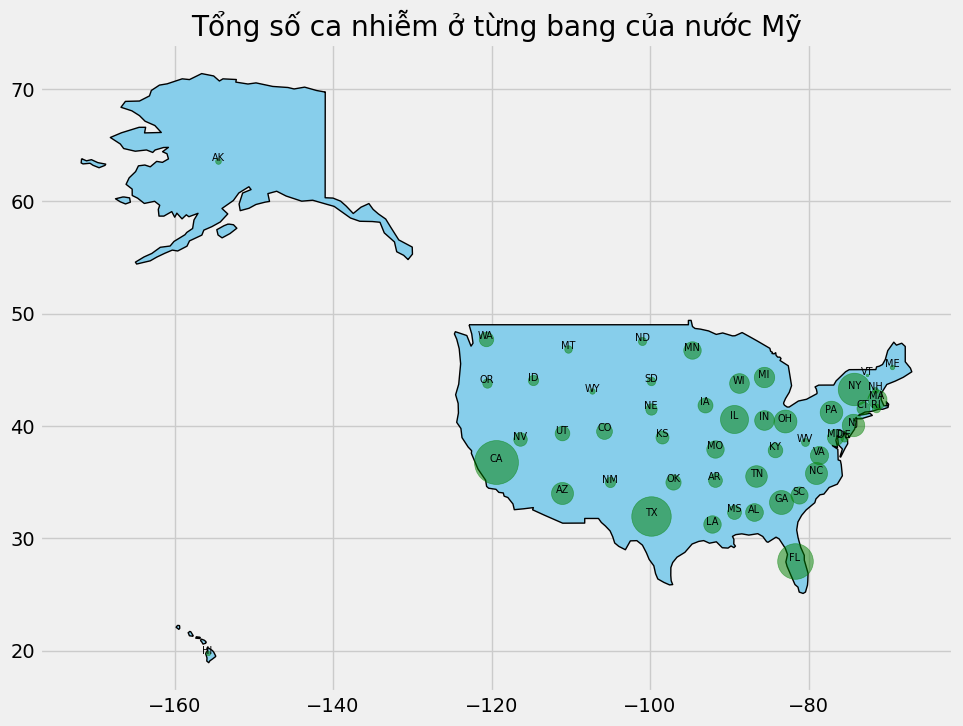

In [7]:
state_df = CRDT_df.groupby('State')[['Cases_Total', 'Deaths_Total']].sum().reset_index()
dropped_states = ['AS', 'DC', 'GU', 'MP', 'PR', 'VI']
state_df = state_df[~state_df['State'].isin(dropped_states)].reset_index(drop=True)
state_dict = state_df.set_index('State').to_dict()
# Tạo 1 dictionary là data chứa thông tin về số ca nhiễm/tử vong và vị trí địa lí của từng bang
data = {}
for _, v in state_dict.items():
    for state, value in v.items():
        if state not in data:
            data[state] = [value]
        else:
            data[state].append(value)
# Tự thêm vĩ tuyến và kinh tuyến các bang ở Mỹ thủ công
data['AK'].extend([63.588753,-154.493062])
data['AL'].extend([32.318231,-86.902298])
data['AR'].extend([35.20105,-91.831833])
data['AZ'].extend([34.048928,-111.093731])
data['CA'].extend([36.778261,-119.417932])
data['CO'].extend([39.550051,-105.782067])
data['CT'].extend([41.603221,-73.087749])
data['DE'].extend([38.910832,-75.52767])
data['FL'].extend([27.994402,-81.760254])
data['GA'].extend([33.247875,-83.441162])
data['HI'].extend([19.741755,-155.844437])
data['IA'].extend([41.878003,-93.097702])
data['ID'].extend([44.068202,-114.742041])
data['IL'].extend([40.633125,-89.398528])
data['IN'].extend([40.551217,-85.602364])
data['KS'].extend([39.011902,-98.484246])
data['KY'].extend([37.839333,-84.270018])
data['LA'].extend([31.244823,-92.145024])
data['MA'].extend([42.407211,-71.382437])
data['MD'].extend([39.045753,-76.641273])
data['ME'].extend([45.253783,-69.445469])
data['MI'].extend([44.314844,-85.602364])
data['MN'].extend([46.729553,-94.6859])
data['MO'].extend([37.964253,-91.831833])
data['MS'].extend([32.354668,-89.398528])
data['MT'].extend([46.879682,-110.362566])
data['NC'].extend([35.759573,-79.0193])
data['ND'].extend([47.551493,-101.002012])
data['NE'].extend([41.492537,-99.901813])
data['NH'].extend([43.193852,-71.572395])
data['NJ'].extend([40.058324,-74.405661])
data['NM'].extend([34.97273,-105.032363])
data['NV'].extend([38.80261,-116.419389])
data['NY'].extend([43.299428,-74.217933])
data['OH'].extend([40.417287,-82.907123])
data['OK'].extend([35.007752,-97.092877])
data['OR'].extend([43.804133,-120.554201])
data['PA'].extend([41.203322,-77.194525])
data['RI'].extend([41.580095,-71.477429])
data['SC'].extend([33.836082,-81.163727])
data['SD'].extend([43.969515,-99.901813])
data['TN'].extend([35.517491,-86.580447])
data['TX'].extend([31.968599,-99.901813])
data['UT'].extend([39.32098,-111.093731])
data['VA'].extend([37.431573,-78.656894])
data['VT'].extend([44.558803,-72.577841])
data['WA'].extend([47.751074,-120.740139])
data['WI'].extend([43.78444,-88.787868])
data['WV'].extend([38.597626,-80.454903])
data['WY'].extend([43.075968,-107.290284])
# Vẽ bản đồ
title = ['Tổng số ca nhiễm ở từng bang của nước Mỹ', 'Tổng số ca chết ở từng bang của nước Mỹ']

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world[world.name == 'United States of America'].plot(edgecolor='black', color='skyblue', linewidth=1, figsize=(12, 8))
rate = 1000 / np.max(state_df.iloc[:, 1])
for k, v in data.items():
    plt.scatter(v[-1], v[-2], s=max(v[0]*rate, 1), alpha=0.5, color='green')
    plt.text(v[-1], v[-2], k, fontsize=7, ha='center')

# plt.axis('off')
plt.title(title[0])
plt.show()

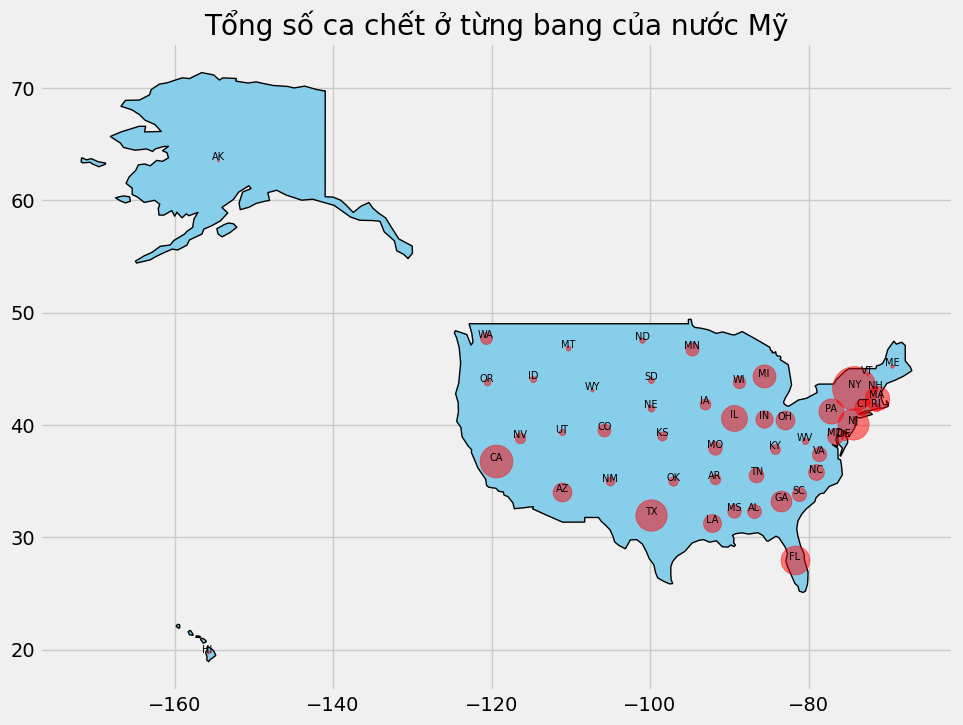

In [8]:
world[world.name == 'United States of America'].plot(edgecolor='black', color='skyblue', linewidth=1, figsize=(12, 8))
rate = 1000 / np.max(state_df.iloc[:, 2])
for k, v in data.items():
    plt.scatter(v[-1], v[-2], s=max(v[1]*rate, 1), alpha=0.5, color='red')
    plt.text(v[-1], v[-2], k, fontsize=7, ha='center')

plt.title(title[1])
plt.show()

**Nhận xét**:
- Quan sát 2 bản đồ trên ta đều thấy được toàn bộ các bang của nước Mỹ đều bị ảnh hưởng bởi `COVID-19`. Số ca nhiễm và tử vong của từng bang đều tỉ lệ thuận với nhau. Tức là nếu một bang có tỉ lệ người nhiễm bệnh cao thì đồng nghĩa với đó là số người tử vong cũng cao theo.
- Về sự phân bố của dịch bệnh thì có một điều thú vị là các bang nằm ở phía đông nước Mỹ như `New York`, `New Jersey`, `Massachusetts`,... có số ca nhiễm và tử vong cao hơn so với các bang nằm ở phía tây và trung tâm như `Washington`, `Nevada`, `New Mexico`. Ngoại trừ một số bang lớn ở phía tây và trung tâm như `California` và `Texas` thì vẫn bị ảnh hưởng nặng bởi `COVID-19`. Điều này có thể là do các bang ở phía đông nước Mỹ có mật độ dân số cao hơn so với các bang ở phía tây, từ đó dẫn đến việc lây nhiễm dễ dàng hơn. Ngoài ra, nếu quan sát bản đồ các bang ở nước Mỹ ở bên dưới, ta dễ dàng thấy được khu vực phía tây nước Mỹ có rất nhiều bang có kích thước nhỏ và nằm chen chúc với nhau, từ đó dẫn đến việc lây nhiễm dễ dàng hơn so với khu vực phía đông, nơi mà có diện tích rộng rãi hơn và vị trí các bang cũng cách xa nhau, thuận lợi cho việc cách ly và kiểm soát dịch bệnh.
- Điều thú vị cuối cùng là 2 quần đảo lớn của Mỹ là `Alaska` và `Hawaii` lại bất ngờ bị ảnh hưởng rất ít bởi dịch bệnh `COVID-19`. Điều này có thể vị trí địa lý của 2 quần đảo này nằm cách biệt với các bang khác ở đất liền, từ đó dễ dàng kiểm soát dịch bệnh hơn. Cụ thể theo cuộc phỏng vấn một bác sĩ ở `Alaska` được thực hiện bởi [tờ báo địa phương Alaska](https://alaskapublic.org/2020/09/21/why-does-alaska-have-the-countrys-lowest-covid-19-death-rate-doctors-explain/), lí do chính giúp `Alaska` ít bị ảnh hưởng bởi COVID-19 là:
    - Đây là khu vực tương đối xa xôi, thời tiết khắc nghiệt, không tập trung dân cư nhiều, từ đó dễ dàng kiểm soát dịch bệnh hơn.
    
    - Alaska có nhiều thời gian hơn để chuẩn bị và tích trữ các xét nghiệm, nguồn cung cấp và điều trị như `Remdesivir` trước khi số ca nhiễm bùng phát.

    - Sự cách ly địa lý của Alaska cho phép nó siết chặt biên giới dễ dàng hơn so với các tiểu bang khác. Các biện pháp hạn chế du lịch quyết liệt ngay từ đầu đã giúp hạn chế sự lây lan của virus.

    - Alaska không có các thành phố và không gian công cộng đông đúc như nhiều tiểu bang khác, điều này làm giảm sự lây truyền.



![Map of States in USA](https://m.media-amazon.com/images/I/712Ub5FLAJL._AC_SL1500_.jpg)

### 4. Phân tích sự ảnh hưởng của yếu tố chủng tộc đến tình hình COVID-19 tại Mỹ


#### 4.1. Giả thuyết đầu tiên: **Liệu số ca nhiễm và tỷ lệ tử vong của nhóm dân tộc có màu da (POC) có cao hơn nhóm dân tộc Da Trắng hay không?** 

##### Tiền xử lý dữ liệu

In [9]:
data = pd.read_csv('CRDT_Data.csv')

# Các cột ca nhiễm và tử vong
case_columns = [
    'Cases_White', 'Cases_Black', 'Cases_Latinx', 
    'Cases_Asian', 'Cases_AIAN', 'Cases_NHPI'
]
death_columns = [
    'Deaths_White', 'Deaths_Black', 'Deaths_Latinx', 
    'Deaths_Asian', 'Deaths_AIAN', 'Deaths_NHPI'
]

# Thay thế các giá trị NaN bằng 0
case_data = data[case_columns].fillna(0)
death_data = data[death_columns].fillna(0)

# Tạo cột mới cho ca nhiễm
case_data['POCs_Cases'] = case_data[['Cases_Black', 'Cases_Latinx', 'Cases_Asian', 'Cases_AIAN', 'Cases_NHPI']].sum(axis=1)
case_data['White_Cases'] = case_data['Cases_White']

# Tạo cột mới cho tử vong
death_data['POCs_Deaths'] = death_data[['Deaths_Black', 'Deaths_Latinx', 'Deaths_Asian', 'Deaths_AIAN', 'Deaths_NHPI']].sum(axis=1)
death_data['White_Deaths'] = death_data['Deaths_White']

# Chọn các cột cần thiết
case_data = case_data[['POCs_Cases', 'White_Cases']]
death_data = death_data[['POCs_Deaths', 'White_Deaths']]


**Nhận xét**
- Sau quá trình trên ta tạo các cột tổng hợp cho POCs và nhóm da trắng:

- POCs_Cases: Tổng số ca nhiễm của các nhóm người da màu (`Black`, `Latinx`, `Asian`, `AIAN`, `NHPI`).

- White_Cases: Số ca nhiễm của nhóm da trắng.

- POCs_Deaths: Tổng số ca tử vong của các nhóm người da màu (`Black`, `Latinx`, `Asian`, `AIAN`, `NHPI`).

- White_Deaths: Số ca tử vong của nhóm da trắng.

##### Mô tả dữ liệu

In [10]:
case_descriptive_stats = case_data.describe()
case_descriptive_stats

,POCs_Cases,White_Cases
count,5.320000e+03,5320.000000
mean,4.606225e+04,61800.606015
std,1.261371e+05,101530.643105
min,0.000000e+00,0.000000
25%,1.693250e+03,2857.000000
50%,1.119800e+04,19007.000000
75%,4.382925e+04,69536.750000
max,1.831250e+06,664121.000000


**Nhận xét Tổng thể:**

- Cả 2 nhóm đều có cùng số lượng mẫu là 5320 cho thấy sự cân bằng dữ liệu.

- Số ca nhiễm trung bình cao hơn: Nhóm người da màu (POCs) có số ca nhiễm trung bình thấp hơn đáng kể so với nhóm người da trắng (White).

- Sự phân tán cao: Độ lệch chuẩn của nhóm POCs cao hơn nhiều, cho thấy rằng số ca nhiễm trong nhóm này phân tán rộng và có sự khác biệt lớn giữa các giá trị, và chứa nhiều giá trị nhiễu.

- Giá trị ngoại lai: Giá trị lớn nhất (max) của nhóm POCs rất cao so với nhóm da trắng, chỉ ra rằng có một số ca nhiễm lớn trong nhóm POCs.

- Phân bố giá trị: Các giá trị ở các phân vị (25%, 50%, 75%) của nhóm POCs đều thấp hơn so với nhóm da trắng, cho thấy rằng ở mọi mức độ phân phối, nhóm da trắng đều có số ca nhiễm cao hơn.

$\Longrightarrow$ Những nhận xét này cho thấy rằng số ca nhiễm ở nhóm người da trắng có xu hướng cao hơn và dày dặc hơn so với nhóm POCs trong khi đó nhóm POCs lại có số ca nhiễm phân tán rộng và thưa. Điều này có thể phản ánh rằng nhìn chung thì số ca dương tính của nhóm da trắng cao hơn nhóm POCs.

In [11]:
death_descriptive_stats = death_data.describe()
death_descriptive_stats

,POCs_Deaths,White_Deaths
count,5320.000000,5320.000000
mean,1524.540226,2079.956391
std,3462.648238,3090.052130
min,0.000000,0.000000
25%,26.000000,90.000000
50%,286.000000,766.000000
75%,1399.000000,2832.500000
max,34288.000000,19497.000000


**Nhận xét Tổng thể:**

- Cả 2 nhóm đều có cùng số lượng mẫu là 5320 cho thấy sự cân bằng dữ liệu.

- Số ca tử vong trung bình: Nhóm người da trắng  có số ca tử vong trung bình cao hơn đáng kể so với nhóm người POCs.

- Sự phân tán: Độ lệch chuẩn của nhóm POCs cao hơn nhiều, cho thấy rằng số ca tử vong trong nhóm này phân tán rộng và có sự khác biệt lớn giữa các giá trị, và chứa nhiều giá trị nhiễu. 

- Giá trị ngoại lai: Giá trị lớn nhất (max) của nhóm POCs rất cao so với nhóm da trắng, chỉ ra rằng có thể có một số lượng nhỏ khu vực hoặc thời gian có số ca tử vong rất cao trong nhóm POCs.

- Phân bố giá trị: Các giá trị ở các phân vị (25%, 50%, 75%) của nhóm da trắng đều cao hơn so với nhóm POCs. Điều này có thể chỉ ra rằng dù số ca tử vong trung bình ở nhóm POCs cao hơn, cho thấy phân phối của số ca tử vong trong nhóm da trắng có thể dày hơn ở các giá trị trung bình đến cao.

$\Longrightarrow$ Những nhận xét này chỉ ra rằng mặc dù số ca tử vong lớn nhất của nhóm POCs cao hơn nhóm da trắng nhưng theo mức dộ phân phối thì số ca tử vong trong nhóm da trắng lại có nhiều giá trị ở mức trung bình đến cao hơn. Điều này có thể phản ánh tỉ lệ tử vong cao của nhóm da trắng cao hơn người POCs.

##### Trực quan hóa dữ liệu

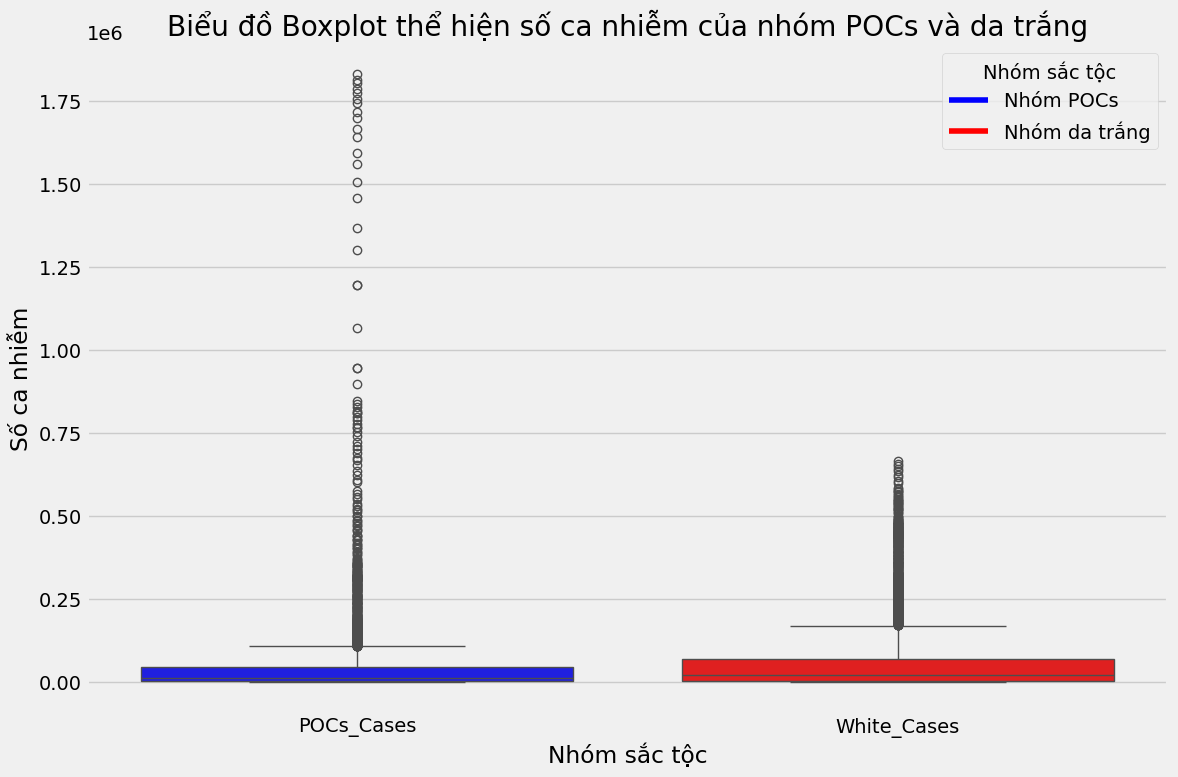

In [12]:
palette = {
    'POCs_Cases': 'blue',  
    'White_Cases': 'red', 
}

# Vẽ biểu đồ boxplot với màu sắc tùy chỉnh
plt.figure(figsize=(12, 8))
sns.boxplot(data=case_data, palette=palette)
plt.title('Biểu đồ Boxplot thể hiện số ca nhiễm của nhóm POCs và da trắng')
plt.xlabel('Nhóm sắc tộc')
plt.ylabel('Số ca nhiễm')
plt.tight_layout()

# Thêm chú thích
legend_handles = [
    plt.Line2D([0], [0], color='blue', lw=4, label='Nhóm POCs'),
    plt.Line2D([0], [0], color='red', lw=4, label='Nhóm da trắng'),
]
plt.legend(handles=legend_handles, title='Nhóm sắc tộc')

plt.show()


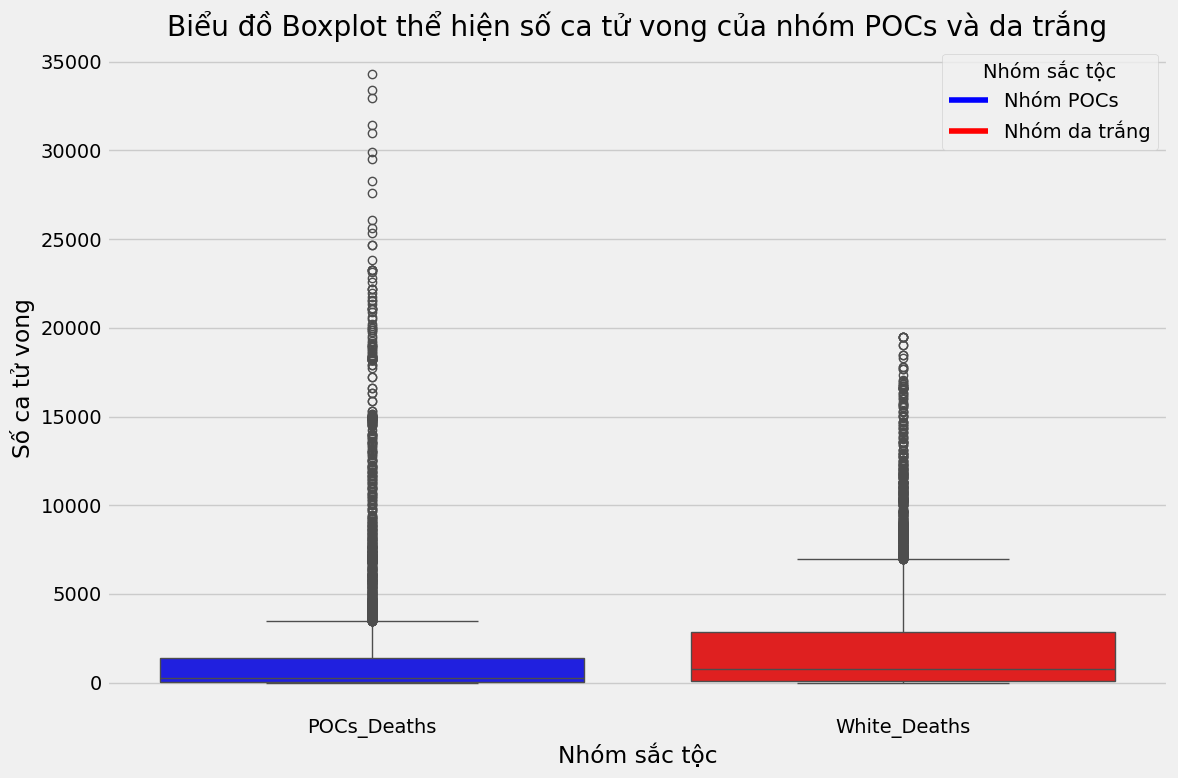

In [13]:
palette = {
    'POCs_Deaths': 'blue',  
    'White_Deaths': 'red', 
}

# Vẽ biểu đồ boxplot với màu sắc tùy chỉnh
plt.figure(figsize=(12, 8))
sns.boxplot(data=death_data, palette=palette)
plt.title('Biểu đồ Boxplot thể hiện số ca tử vong của nhóm POCs và da trắng')
plt.xlabel('Nhóm sắc tộc')
plt.ylabel('Số ca tử vong')
plt.tight_layout()

# Thêm chú thích
legend_handles = [
    plt.Line2D([0], [0], color='blue', lw=4, label='Nhóm POCs'),
    plt.Line2D([0], [0], color='red', lw=4, label='Nhóm da trắng'),
]
plt.legend(handles=legend_handles, title='Nhóm sắc tộc')

plt.show()

**Nhận xét tổng thể**

- Tóm lại, 2 biểu đồ `boxplot` ở trên cho ta thấy nhóm người da trắng có xu hướng ghi nhận nhiều ca nhiễm và tử vong cao hơn so với nhóm người da màu tại hầu hết các trường hợp. Tuy nhiên, cũng có một số ngoại lệ với số ca tử vong cao bất thường trong nhóm người da màu tại một vài trường hợp nhất định.

$\Longrightarrow$ Điều này có thể phản ánh rằng xét trên tổng thể số ca nhiễm và tỉ lệ tử vong cao của nhóm da trắng phân bố dày đặt và cao hơn nhóm POCs.

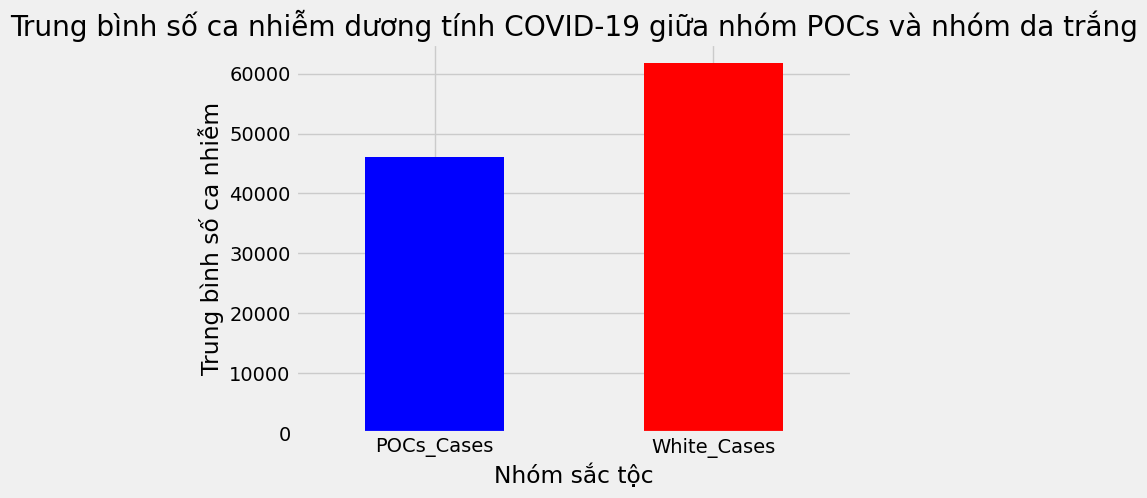

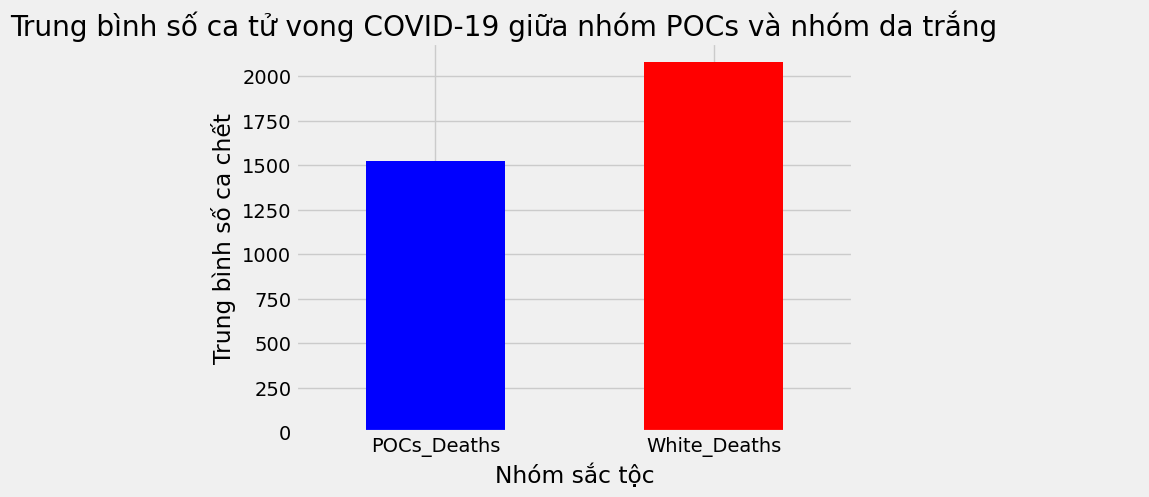

In [14]:
case_means = case_data[['POCs_Cases', 'White_Cases']].mean()

case_means.plot(kind='bar', color=['blue', 'red'])
plt.title('Trung bình số ca nhiễm dương tính COVID-19 giữa nhóm POCs và nhóm da trắng')
plt.xlabel('Nhóm sắc tộc')
plt.ylabel('Trung bình số ca nhiễm')
plt.xticks(rotation=0)
plt.show()

death_means = death_data[['POCs_Deaths', 'White_Deaths']].mean()

death_means.plot(kind='bar', color=['blue', 'red'])
plt.title('Trung bình số ca tử vong COVID-19 giữa nhóm POCs và nhóm da trắng                ')
plt.xlabel('Nhóm sắc tộc')
plt.ylabel('Trung bình số ca chết')
plt.xticks(rotation=0)
plt.show()

**Nhận xét tổng thể**

- Dựa vào biểu đồ cột ở trên cho ta hình dung rõ hơn rằng số ca nhiễm trung bình và số ca tử vong trung bình của nhóm da trắng cao hơn nhóm POCs rõ rệt. Điều này có thể phản ánh nhìn chung thì số ca nhiễm và tỉ lệ tử vong cao của nhóm da trắng cao hơn nhóm POCs.


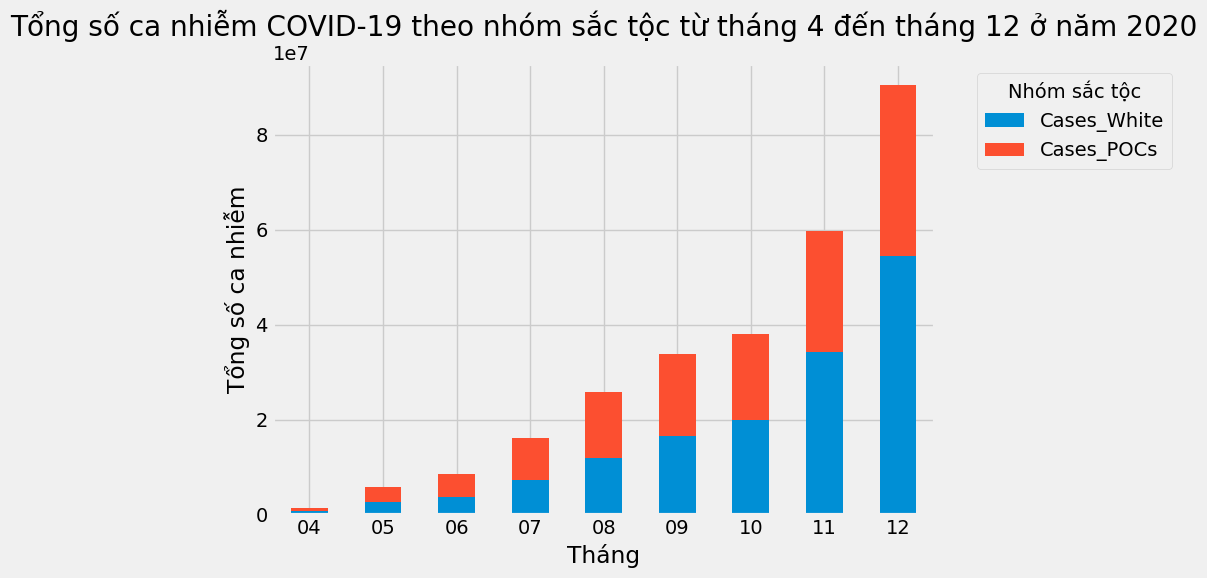

In [15]:
# Tạo DataFrame từ dữ liệu
df = pd.DataFrame(data)

# Tính lại cột Cases_POCs bằng cách tổng hợp các cột số ca nhiễm của các nhóm dân tộc thuộc POCs
df['Cases_POCs'] = df[['Cases_Black', 'Cases_Latinx', 'Cases_Asian', 'Cases_AIAN', 'Cases_NHPI']].sum(axis=1)

# Tính tổng số ca COVID-19 theo từng nhóm dân tộc trong mỗi tháng
df['Month'] = df['Date'].apply(lambda x: str(x)[4:6])
df['Year'] = df['Date'].apply(lambda x: str(x)[:4])

# Lọc qua cột 'Month' và lấy các giá trị trong months chỉ trong năm 2020
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
df_filtered = df[(df["Month"].isin(months)) & (df["Year"] == '2020')]

# Tính tổng số ca COVID-19 theo từng nhóm dân tộc trong mỗi tháng
cases_by_month = df_filtered.groupby('Month')[['Cases_White', 'Cases_POCs']].sum()

# Vẽ biểu đồ cột chồng lên nhau
cases_by_month.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Tháng')
plt.ylabel('Tổng số ca nhiễm')
plt.title('Tổng số ca nhiễm COVID-19 theo nhóm sắc tộc từ tháng 4 đến tháng 12 ở năm 2020')
plt.legend(title='Nhóm sắc tộc', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Nhận xét tổng thể**

- Dựa vào biểu đồ cột chồng ở trên cho ta hình dung rõ hơn rằng trong năm 2020 đại dịch COVID-19 ghi nhận từ tháng 4 và số ca nhiễm từ tháng 4 đến tháng 7 nhóm da trắng thấp hơn nhóm POCs nhưng không đáng kể. Đặc biệt là từ tháng 8 trở đi nhóm da trắng luôn cao hơn nhóm POCs với độ chênh lệch rất lớn.

$\Longrightarrow$ Điều này có thể phản ánh số ca nhiễm của nhóm da trắng đêu cao hơn nhóm POCs.

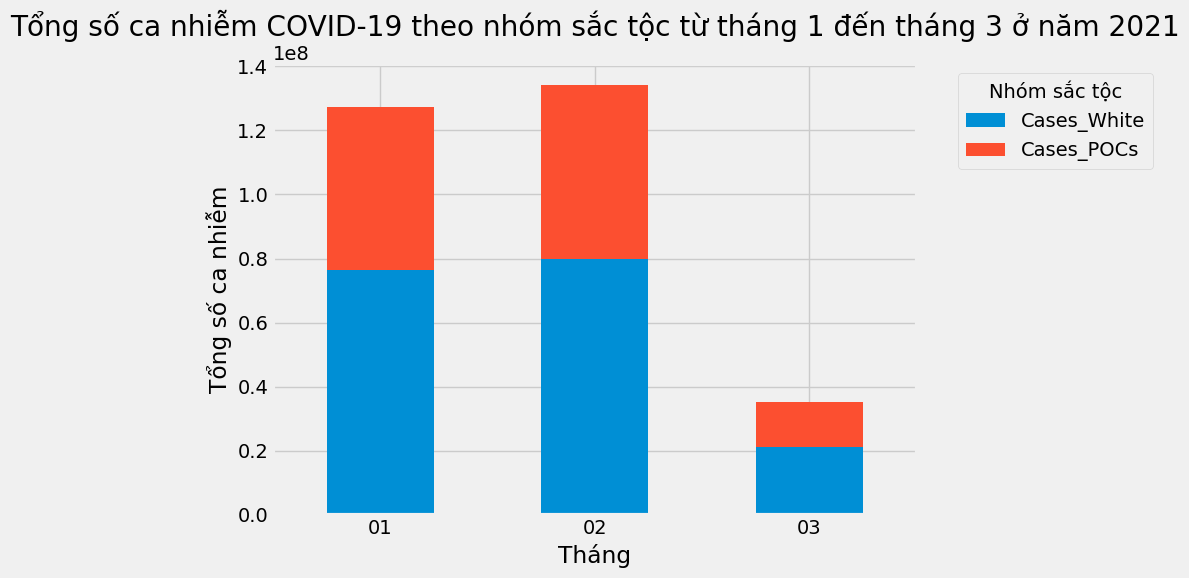

In [16]:
# Tạo DataFrame từ dữ liệ
df = pd.DataFrame(data)

# Tính lại cột Cases_POCs bằng cách tổng hợp các cột số ca nhiễm của các nhóm sắc tộc thuộc POCs
df['Cases_POCs'] = df[['Cases_Black', 'Cases_Latinx', 'Cases_Asian', 'Cases_AIAN', 'Cases_NHPI', 'Cases_Multiracial']].sum(axis=1)

# Tính tổng số ca COVID-19 theo từng nhóm sắc tộc trong mỗi tháng
df['Month'] = df['Date'].apply(lambda x: str(x)[4:6])
df['Year'] = df['Date'].apply(lambda x: str(x)[:4])

# Lọc qua cột 'Month' và lấy các giá trị trong months chỉ trong năm 2021
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
df_filtered = df[(df["Month"].isin(months)) & (df["Year"] == '2021')]

# Tính tổng số ca COVID-19 theo từng nhóm dân tộc trong mỗi tháng
cases_by_month = df_filtered.groupby('Month')[['Cases_White', 'Cases_POCs']].sum()

# Vẽ biểu đồ cột chồng lên nhau
cases_by_month.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Tháng')
plt.ylabel('Tổng số ca nhiễm')
plt.title('Tổng số ca nhiễm COVID-19 theo nhóm sắc tộc từ tháng 1 đến tháng 3 ở năm 2021')
plt.legend(title='Nhóm sắc tộc', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Nhận xét tổng thể**

- Dựa vào biểu đồ cột chồng ở trên cho ta hình dung rõ hơn rằng trong năm 2021 đại dịch COVID-19 chỉ ghi nhận trong 3 tháng đầu và số ca nhiễm của các tháng trong năm đó của nhóm da trắng ở USA luôn cao hơn nhóm người POCs.

$\Longrightarrow$ Điều này có thể phản ánh số ca nhiễm của nhóm da trắng cao hơn nhóm POCs.

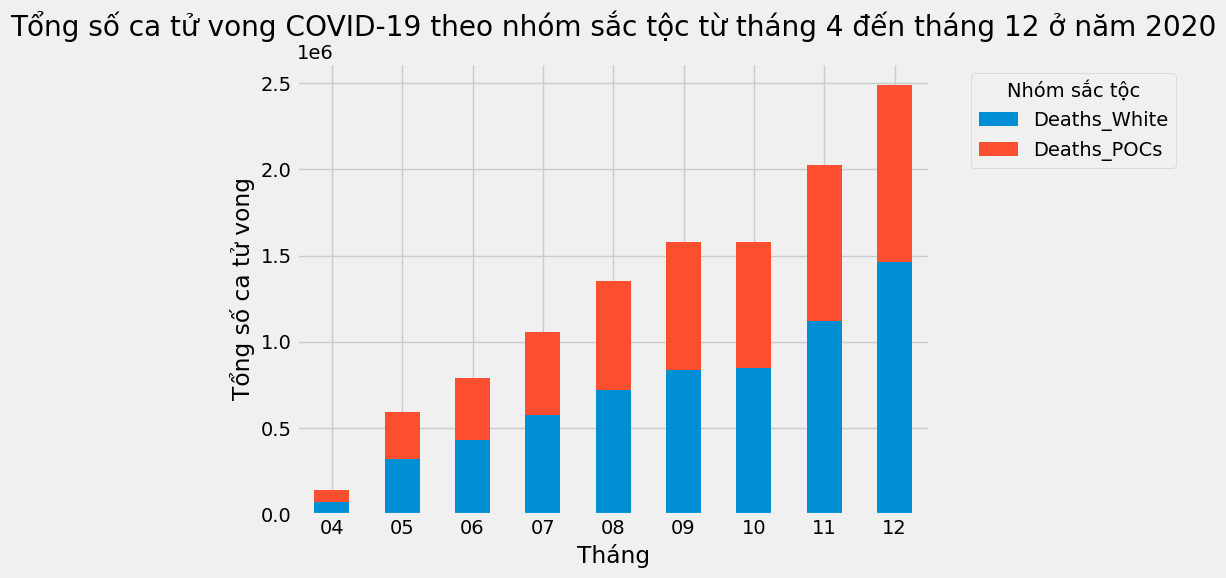

In [17]:
# Tạo DataFrame từ dữ liệu
df = pd.DataFrame(data)

# Tính lại cột Deaths_POCs bằng cách tổng hợp các cột số ca chết của các nhóm sắc tộc thuộc POCs
df['Deaths_POCs'] = df[['Deaths_Black', 'Deaths_Latinx', 'Deaths_Asian', 'Deaths_AIAN', 'Deaths_NHPI', 'Deaths_Multiracial']].sum(axis=1)

# Tính tổng số ca COVID-19 theo từng nhóm sắc tộc trong mỗi tháng
df['Month'] = df['Date'].apply(lambda x: str(x)[4:6])
df['Year'] = df['Date'].apply(lambda x: str(x)[:4])

# Lọc qua cột 'Month' và lấy các giá trị trong months chỉ trong năm 2020
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
df_filtered = df[(df["Month"].isin(months)) & (df["Year"] == '2020')]

# Tính tổng số ca COVID-19 theo từng nhóm dân tộc trong mỗi tháng
cases_by_month = df_filtered.groupby('Month')[['Deaths_White', 'Deaths_POCs']].sum()

# Vẽ biểu đồ cột chồng lên nhau
cases_by_month.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Tháng')
plt.ylabel('Tổng số ca tử vong')
plt.title('Tổng số ca tử vong COVID-19 theo nhóm sắc tộc từ tháng 4 đến tháng 12 ở năm 2020')
plt.legend(title='Nhóm sắc tộc', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Nhận xét tổng thể**

- Dựa vào biểu đồ cột chồng ở trên cho ta hình dung rõ hơn rằng trong năm 2020 trong các tháng bùng nổ COVID-19 số ca tử vong của nhóm da trắng luôn cao hơn nhóm POCs.

$\Longrightarrow$ Điều này có thể phản ánh rằng tỉ lệ tử vong của nhóm da trắng cao hơn nhóm POCs.

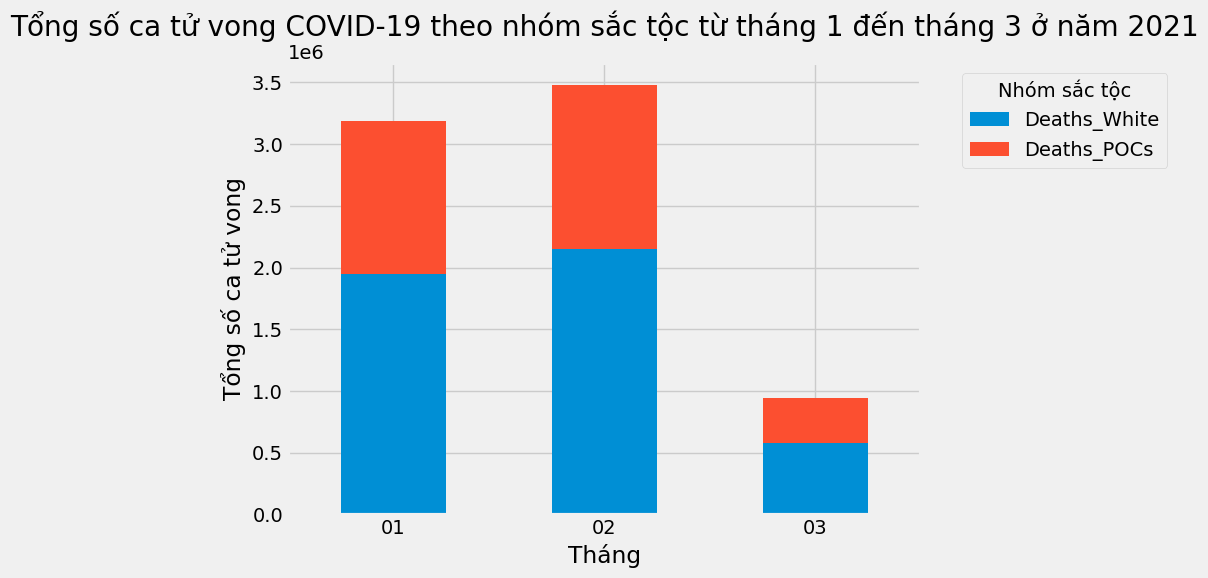

In [18]:
# Tạo DataFrame từ dữ liệu
df = pd.DataFrame(data)

# Tính lại cột Cases_POCs bằng cách tổng hợp các cột số ca chết của các nhóm sắc tộc thuộc POCs
df['Deaths_POCs'] = df[['Deaths_Black', 'Deaths_Latinx', 'Deaths_Asian', 'Deaths_AIAN', 'Deaths_NHPI', 'Deaths_Multiracial']].sum(axis=1)

# Tính tổng số ca COVID-19 theo từng nhóm sắc tộc trong mỗi tháng
df['Month'] = df['Date'].apply(lambda x: str(x)[4:6])
df['Year'] = df['Date'].apply(lambda x: str(x)[:4])

# Lọc qua cột 'Month' và lấy các giá trị trong months chỉ trong năm 2021
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
df_filtered = df[(df["Month"].isin(months)) & (df["Year"] == '2021')]

# Tính tổng số ca COVID-19 theo từng nhóm dân tộc trong mỗi tháng
cases_by_month = df_filtered.groupby('Month')[['Deaths_White', 'Deaths_POCs']].sum()

# Vẽ biểu đồ cột chồng lên nhau
cases_by_month.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Tháng')
plt.ylabel('Tổng số ca tử vong')
plt.title('Tổng số ca tử vong COVID-19 theo nhóm sắc tộc từ tháng 1 đến tháng 3 ở năm 2021')
plt.legend(title='Nhóm sắc tộc', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Nhận xét tổng thể**

- Dựa vào biểu đồ cột chồng ở trên cho ta hình dung rõ hơn rằng trong năm 2021 trong các tháng bùng nổ COVID-19 số ca tử vong của nhóm da trắng luôn cao hơn nhóm POCs.

$\Longrightarrow$ Điều này có thể phản ánh rằng tỉ lệ tử vong của nhóm da trắng cao hơn nhóm POCs.

##### Áp dụng phương pháp `bootstrap` để kiểm định giả thuyết 

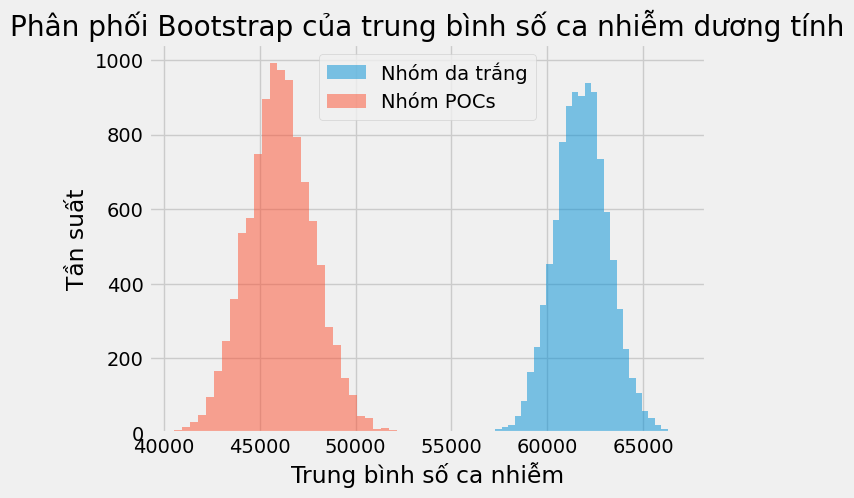

Hiệu Trung bình: -15721.849583627816
Xác suất nhóm POCS có số ca nhiễm cao hơn nhóm da trắng: 0.0


In [19]:
def bootstrap_mean(data, n_bootstrap=10000):
    bootstrap_means = []
    for _ in range(n_bootstrap):
        # Lấy mẫu ngẫu nhiên từ dữ liệu
        sample = np.random.choice(data, size=len(data), replace=True)
        # Tính trung bình của mẫu và thêm vào bootstrap_means
        bootstrap_means.append(np.mean(sample))
    return bootstrap_means

# Đặt seed cho phép tái tạo kết quả
np.random.seed(42)

# Trích xuất dữ liệu về số ca cho nhóm White và POCs
white_cases = case_data['White_Cases'].values
poc_cases = case_data['POCs_Cases'].values

# Tính bootstrap means cho cả hai nhóm
white_bootstrap_means = bootstrap_mean(white_cases)
poc_bootstrap_means = bootstrap_mean(poc_cases)

# Vẽ phân phối bootstrap
plt.hist(white_bootstrap_means, alpha=0.5, label='Nhóm da trắng', bins=30)
plt.hist(poc_bootstrap_means, alpha=0.5, label='Nhóm POCs', bins=30)
plt.legend()
plt.title('Phân phối Bootstrap của trung bình số ca nhiễm dương tính')
plt.xlabel('Trung bình số ca nhiễm')
plt.ylabel('Tần suất')
plt.show()

# Tính hiệu trung bình và giá trị p
mean_diff = np.mean(poc_bootstrap_means) - np.mean(white_bootstrap_means)
p_value = np.mean(np.array(poc_bootstrap_means) > np.array(white_bootstrap_means))

print(f'Hiệu Trung bình: {mean_diff}')
print(f'Xác suất nhóm POCS có số ca nhiễm cao hơn nhóm da trắng: {p_value}')

**Nhận xét tổng**
- Với phương pháp bootstrap trên ta thấy có sự tách biệt hoàn toàn giữa 2 khối và hiệu trung bình giữa số ca nhiễm trung bình của nhóm POCs và nhóm da trắng là một khoảng rất lớn: `15722`. `p-value` được tính là 0, điều này có nghĩa là xác suất số ca nhiễm của nhóm POCs cao hơn nhóm da trắng trong số ca nhiễm COVID-19 là không thể.

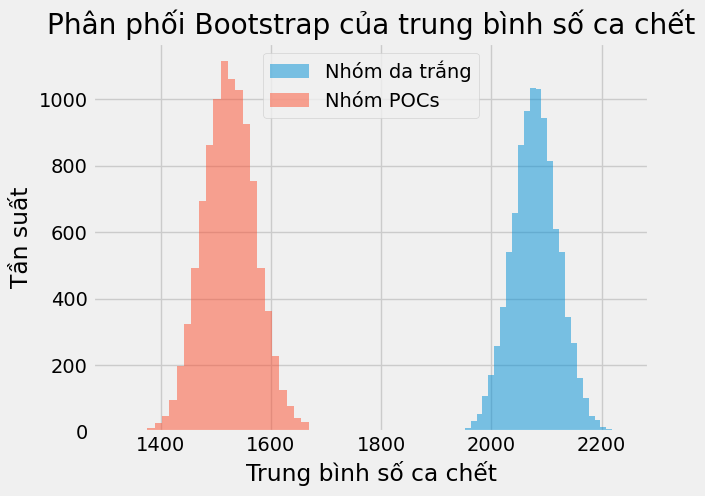

Hiệu Trung bình: -555.2717916541346
Xác suất nhóm POCS có tỉ lệ tử vong cao hơn nhóm da trắng: 0.0


In [20]:
def bootstrap_mean(data, n_bootstrap=10000):
    bootstrap_means = []
    for _ in range(n_bootstrap):
        # Lấy mẫu ngẫu nhiên từ dữ liệu
        sample = np.random.choice(data, size=len(data), replace=True)
        # Tính trung bình của mẫu và thêm vào bootstrap_means
        bootstrap_means.append(np.mean(sample))
    return bootstrap_means

# Đặt seed cho phép tái tái tạo kết quả
np.random.seed(42)

# Trích xuất dữ liệu về số ca cho nhóm White và POCs
white_deaths = death_data['White_Deaths'].values
poc_deaths = death_data['POCs_Deaths'].values

# Tính bootstrap means cho cả hai nhóm
white_bootstrap_means = bootstrap_mean(white_deaths)
poc_bootstrap_means = bootstrap_mean(poc_deaths)

# Vẽ phân phối bootstrap
plt.hist(white_bootstrap_means, alpha=0.5, label='Nhóm da trắng', bins=30)
plt.hist(poc_bootstrap_means, alpha=0.5, label='Nhóm POCs', bins=30)
plt.legend()
plt.title('Phân phối Bootstrap của trung bình số ca chết')
plt.xlabel('Trung bình số ca chết')
plt.ylabel('Tần suất')
plt.show()

# Tính hiệu trung bình và giá trị p
mean_diff = np.mean(poc_bootstrap_means) - np.mean(white_bootstrap_means)
p_value = np.mean(np.array(poc_bootstrap_means) > np.array(white_bootstrap_means))

print(f'Hiệu Trung bình: {mean_diff}')
print(f'Xác suất nhóm POCS có tỉ lệ tử vong cao hơn nhóm da trắng: {p_value}')

**Nhận xét tổng**
- Với phương pháp bootstrap trên ta thấy có sự tách biệt hoàn toàn giữa 2 khối và hiệu trung bình giữa số ca nhiễm trung bình của nhóm POCs và nhóm da trắng là một khoảng rất lớn: `555`. `p-value` được tính là 0, điều này có nghĩa là xác suất số ca tử vong của nhóm POCs cao hơn nhóm da trắng trong số ca nhiễm COVID-19 là không thể.

$\Longrightarrow$ **Tổng kết**: Dựa theo những phân tích trên ta kết luận được rằng nhóm người Mỹ gốc Phi và những người da màu khác (POCs) có số ca dương tính và tỉ lệ tử vong cao hơn người da trắng ở USA là môt giả thuyết sai. Thêm vào đó, để chứng minh và làm rõ hơn phân tích trên là đúng ta có thể thông qua các bài báo uy tín đã được công bố trên internet với kết quả tương tự ([bài báo "THE COLOR OF CORONAVIRUS:COVID-19 DEATHS BY RACE AND ETHNICITY IN THE U.S."](https://www.apmresearchlab.org/covid/deaths-by-race) được đăng trên APM research lab). Ngoài ra theo [bài báo "Study: Covid's racial disparities made some white people less vigilant about the virus"](https://www.nbcnews.com/news/nbcblk/study-covids-racial-disparities-made-white-people-less-vigilant-virus-rcna22613) ở trang NBC news cho thấy những người da trắng được khảo sát ở Hoa Kỳ vào mùa thu năm 2020 ít quan tâm hơn và thậm chí còn có nhiều khả năng trốn tránh các biện pháp phòng ngừa an toàn cho đại dịch sau khi biết về những cách không cân xứng mà nó tác động đến cộng đồng Da đen và các cộng đồng da màu khác vì họ tin rằng đó “không phải là vấn đề của người da trắng” chính vì điều đó cũng có khả năng gây ra việc số ca dương tính và tỉ lệ tử vong của người da trắng cao hơn nhóm POCs ở USA.



#### 4.2. Giả thuyết thứ hai: **Liệu có sự khác biệt đáng kể về số ca nhiễm xác nhận và tỷ lệ tử vong giữa các nhóm chủng tộc trên khắp Hoa Kỳ và lãnh thổ hay không?**

Ở phần này ta sẽ thực hiện phân tích sự ảnh hưởng của chủng tộc đến số ca nhiễm và tử vong do COVID-19 tại Mỹ. Để làm được điều này, ta sẽ xem xét số ca nhiễm và tử vong của 6 nhóm dân tộc chính: `người da trắng`, `người da màu`, `người Latinh`, `người Á châu`, `người Da đỏ và người Bản địa Alaska (AIAN)`, `người Hawaii bản địa và người Đảo Thái Bình Dương (NHPI)`.


##### Số ca nhiễm và tử vong của từng nhóm dân tộc theo thời gian

In [21]:
df_42 = pd.read_csv('CRDT_Data.csv')

# Các cột ca nhiễm và tử vong
case_columns = [
    'Year', 'Month', 'Day', 'State', 'Cases_White', 'Cases_Black', 'Cases_Latinx', 
    'Cases_Asian', 'Cases_AIAN', 'Cases_NHPI'
]
death_columns = [
    'Year', 'Month', 'Day', 'State', 'Deaths_White', 'Deaths_Black', 'Deaths_Latinx', 
    'Deaths_Asian', 'Deaths_AIAN', 'Deaths_NHPI'
]
df_42['Date'] = df_42['Date'].astype(str)
df_42['Year'] = df_42['Date'].str[:4].astype(int)
df_42['Month'] = df_42['Date'].str[4:6].astype(int)
df_42['Day'] = df_42['Date'].str[6:].astype(int)

df_42.drop('Date', axis=1, inplace=True)
# Thay thế các giá trị NaN bằng 0
case_data = df_42[case_columns].fillna(0)
death_data = df_42[death_columns].fillna(0)

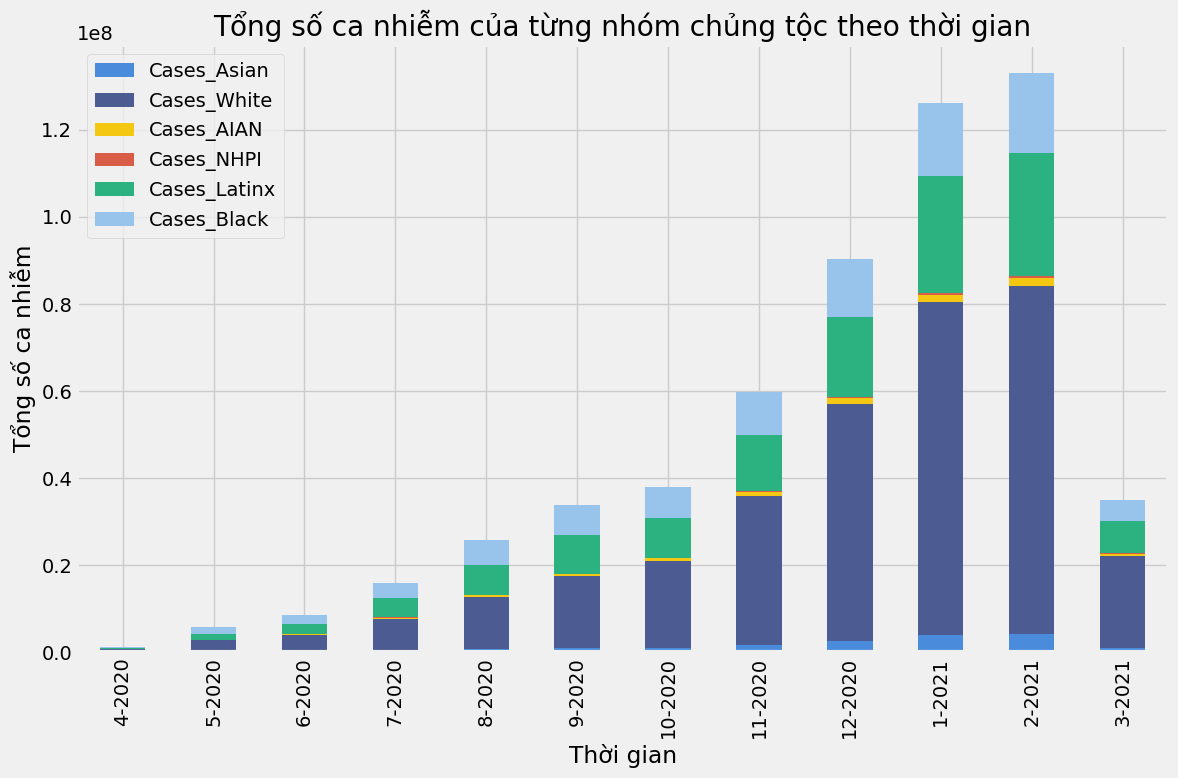

In [22]:

df1 = case_data.groupby(['Month', 'Year'])[['Cases_Asian', 'Cases_White', 'Cases_AIAN', 'Cases_NHPI', 'Cases_Latinx', 'Cases_Black']].sum().reset_index()
df1['Date'] = df1['Month'].astype(str) + '-' + df1['Year'].astype(str)
df1.sort_values('Year', inplace=True)
df1.drop(['Month', 'Year'], axis=1, inplace=True)

ethnicity_colors = {
'Cases_Asian': '#4B8BDC',
'Cases_White': '#4C5C92',
'Cases_AIAN': '#F3C712',
'Cases_NHPI': '#D95C46',
'Cases_Latinx': '#2CB180',
'Cases_Black': '#98C3EA'
}
colors = [ethnicity_colors[col] for col in df1.columns if col in ethnicity_colors]
# vẽ stacked bar chart cho số ca nhiễm theo từng nhóm chủng tộc theo tháng
df1.plot(x='Date', kind='bar', stacked=True, figsize=(12, 8), color=colors)
plt.title('Tổng số ca nhiễm của từng nhóm chủng tộc theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Tổng số ca nhiễm')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

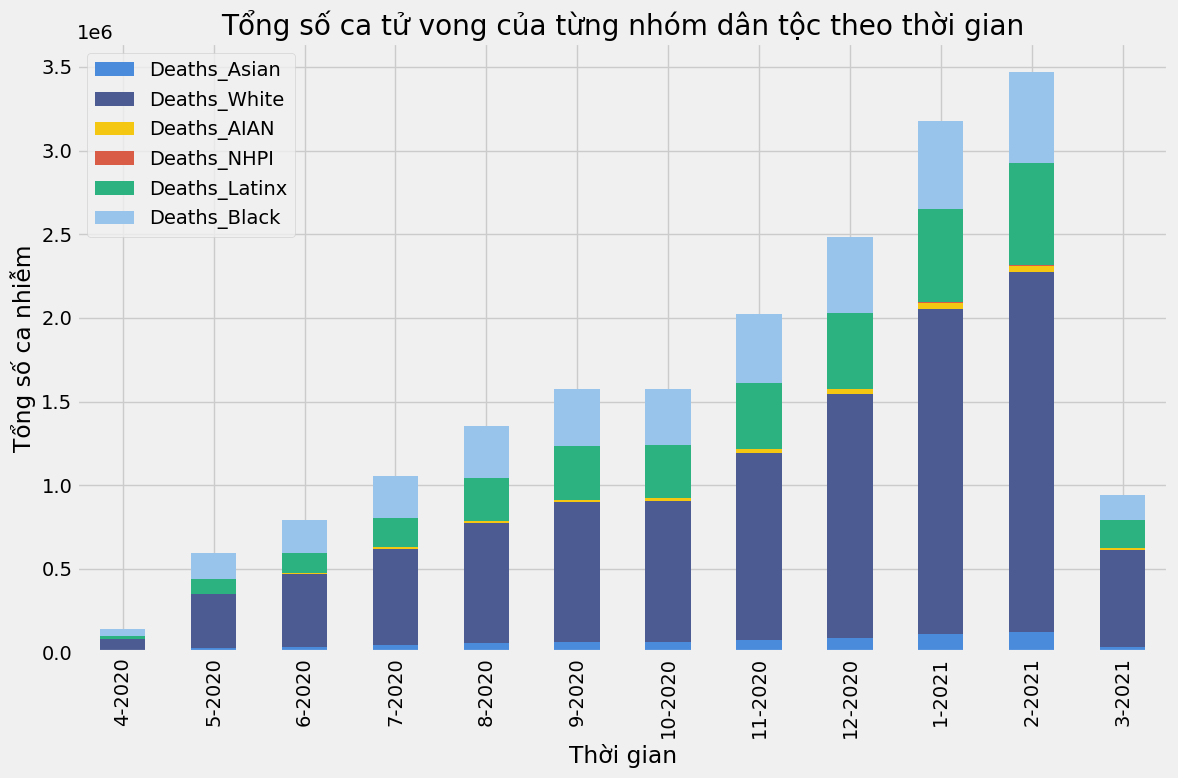

In [23]:
df2 = death_data.groupby(['Month', 'Year'])[['Deaths_Asian', 'Deaths_White', 'Deaths_AIAN', 'Deaths_NHPI', 'Deaths_Latinx', 'Deaths_Black']].sum().reset_index()
df2['Date'] = df2['Month'].astype(str) + '-' + df2['Year'].astype(str)
df2.sort_values('Year', inplace=True)
df2.drop(['Month', 'Year'], axis=1, inplace=True)

ethnicity_colors = {
'Deaths_Asian': '#4B8BDC',
'Deaths_White': '#4C5C92',
'Deaths_AIAN': '#F3C712',
'Deaths_NHPI': '#D95C46',
'Deaths_Latinx': '#2CB180',
'Deaths_Black': '#98C3EA'
}
colors = [ethnicity_colors[col] for col in df2.columns if col in ethnicity_colors]
# vẽ stacked bar chart cho số ca tử vong theo từng nhóm chủng tộc theo tháng
df2.plot(x='Date', kind='bar', stacked=True, figsize=(12, 8), color=colors)
plt.title('Tổng số ca tử vong của từng nhóm dân tộc theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Tổng số ca nhiễm')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Nhận xét:**
- Trong xuyên suốt khoảng thời gian 1 năm từ tháng 4/2020 tới tháng 3/2021, Người da trắng luôn luôn chiếm từ 50-60% tổng số ca nhiễm dương tính với COVID-19. Người Latinh và người da đen lần lượt chiếm đứng thứ 2 và 3 trên tổng số ca nhiễm dương tính, trong khi AIAN, người Châu Á và NHPI chiếm trọng số rất ít cùng nhau.
- Tương tự như số ca nhiễm, người da trắng cũng chiếm tỷ lệ cao nhất về số ca tử vong với COVID-19, chiếm khoảng 50-60% tổng số ca tử vong trong xuyên suốt 1 năm. Người Latinh và người da đen lần lượt chiếm vị trí thứ 2 và 3 về số ca tử vong, trong khi AIAN, người Châu Á và NHPI chiếm tỷ lệ rất ít cùng nhau.

##### Phân tích chỉ số People of Color Death Rate (POCDR)

Chỉ số `POCDR (People of Color Death Rate)` là một phân tích tỷ lệ tử vong của người Màu (People of Color) so với tỷ lệ tử vong của người Da trắng (Whites) trong một tiểu bang cụ thể. Chỉ số này được tính bằng cách chia tỷ lệ tử vong của người Màu cho tỷ lệ tử vong của người Da trắng trong cùng một tiểu bang.

Chỉ số `POCDR` giúp đánh giá mức độ chênh lệch tử vong giữa người Màu và người Da trắng trong một tiểu bang cụ thể. Nếu chỉ số này vượt quá một, nó cho thấy tỷ lệ tử vong của người Màu cao hơn so với người Da trắng, điều này có thể chỉ ra sự bất bình đẳng trong chăm sóc sức khỏe hoặc các yếu tố khác gây ra sự chênh lệch này.

In [24]:
selected_columns = [
    'State', 'Deaths_White', 'Deaths_Black', 'Deaths_Latinx', 
    'Deaths_Asian', 'Deaths_AIAN', 'Deaths_NHPI'
]
POCDR_df = df_42[selected_columns]
POCDR_df = POCDR_df.groupby('State')[['Deaths_White', 'Deaths_Black', 'Deaths_Latinx', 'Deaths_Asian', 'Deaths_AIAN', 'Deaths_NHPI']].sum().reset_index()
# tạo các df mới
POCDR_Black = POCDR_df[['State', 'Deaths_White', 'Deaths_Black']]
POCDR_Latinx = POCDR_df[['State', 'Deaths_White', 'Deaths_Latinx']]
POCDR_Asian = POCDR_df[['State', 'Deaths_White', 'Deaths_Asian']]
POCDR_AIAN = POCDR_df[['State', 'Deaths_White', 'Deaths_AIAN']]
POCDR_NHPI = POCDR_df[['State', 'Deaths_White', 'Deaths_NHPI']]
# Tạo cột mới cho mỗi nhóm chủng tộc
POCDR_Black['POCDR'] = POCDR_Black['Deaths_Black'] / POCDR_Black['Deaths_White']
POCDR_Latinx['POCDR'] = POCDR_Latinx['Deaths_Latinx'] / POCDR_Latinx['Deaths_White']
POCDR_Asian['POCDR'] = POCDR_Asian['Deaths_Asian'] / POCDR_Asian['Deaths_White']
POCDR_AIAN['POCDR'] = POCDR_AIAN['Deaths_AIAN'] / POCDR_AIAN['Deaths_White']
POCDR_NHPI['POCDR'] = POCDR_NHPI['Deaths_NHPI'] / POCDR_NHPI['Deaths_White']
# Sắp xếp các df theo cột POCDR
POCDR_Black.sort_values('POCDR', ascending=False, inplace=True)
POCDR_Latinx.sort_values('POCDR', ascending=False, inplace=True)
POCDR_Asian.sort_values('POCDR', ascending=False, inplace=True)
POCDR_AIAN.sort_values('POCDR', ascending=False, inplace=True)
POCDR_NHPI.sort_values('POCDR', ascending=False, inplace=True)

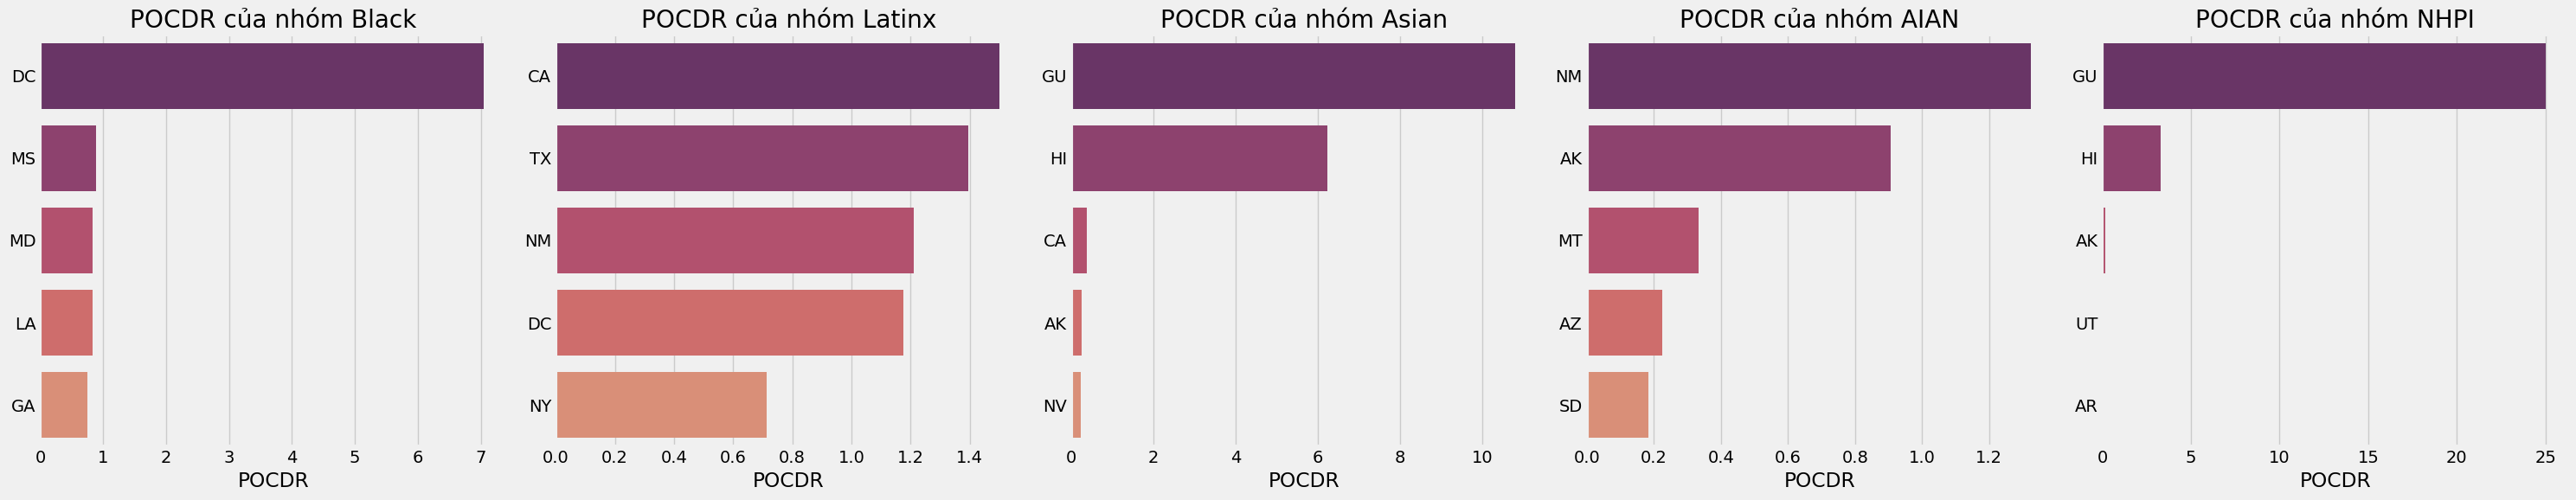

In [25]:
# Vẽ biểu đồ
# Ứng với mỗi chủng tộc chỉ hiển thị 5 bang có chỉ số POCDR cao nhất
POCDR_df = [POCDR_Black, POCDR_Latinx, POCDR_Asian, POCDR_AIAN, POCDR_NHPI]
title = ['Black', 'Latinx', 'Asian', 'AIAN', 'NHPI']
fig, ax = plt.subplots(1, 5, figsize=(30, 6))
for i in range(5):
    sns.barplot(x='POCDR', y='State', data=POCDR_df[i].head(), ax=ax[i], palette='flare_r')
    ax[i].set_title(f'POCDR của nhóm {title[i]}')
    ax[i].set_xlabel('POCDR')
    ax[i].set_ylabel('')
plt.tight_layout()
plt.show()

**Nhận xét:**
- Kết quả cho thấy nhóm người da màu `(Black)` có chỉ số `POCDR` cao đột biến ở bang `DC` với giá trị lên tới 7, điều này có nghĩa là tỷ lệ tử vong của người da màu ở bang DC cao hơn 7 lần so với người da trắng ở bang DC. Trong khi đó ở các bang khác của Mỹ thì chỉ số `POCDR` của nhóm người da màu `(Black)` luôn ở mức thấp hơn 1, tức là tỷ lệ tử vong của nhóm người da màu `(Black)` luôn thấp hơn so với người da trắng.
- Nhóm người `(Latinx)` có chỉ số `POCDR` tương đối khiêm tốn khi chỉ số cao nhất của nhóm này là ở bang `CA` với giá trị khoảng 1.5. Chỉ có duy nhất 4 bang là `CA`, `TX`, `NM`, `DC` và `NY` là có chỉ số POCDR của nhóm người `Latinx` cao hơn 1, còn lại đều thấp hơn 1.
- Giống như nhóm người `Latinx`, chỉ số `POCDR` của nhóm `AIAN` tương đối thấp, chỉ có duy nhất bang `NM` là có chỉ số `POCDR` của nhóm người `AIAN` lớn hơn 1.
- Cuối cùng là có một sự thú vị trùng hợp ở chỉ số `POCDR` của nhóm người `Asian` và `NHPI` khi cả 2 nhóm này đều có chỉ số `POCDR` lớn nhất ở 2 bang là `GU` và `HI`, và các chỉ số này đều cực kì cao, cụ thể chỉ số `POCDR` của nhóm `Asian` ở bang `GU` là hơn 10 còn của nhóm `NHPI` là đến tận 25. Điều này cho thấy rằng tỷ lệ tử vong của nhóm người `Asian` và `NHPI` lớn hơn rất nhiều so với người da trắng ở 2 bang này. Ngoài 2 bang này ra thì chỉ số `POCDR` của nhóm `Asian` và `NHPI` đều thấp hơn 1 ở các bang còn lại.

##### Gom nhóm các chủng tộc theo tổng số ca nhiễm và tử vong

In [26]:
selected_columns = [
    'Cases_White', 'Cases_Black', 'Cases_Latinx',
    'Cases_Asian', 'Cases_AIAN', 'Cases_NHPI',
    'Deaths_White', 'Deaths_Black', 'Deaths_Latinx',
    'Deaths_Asian', 'Deaths_AIAN', 'Deaths_NHPI'
]
cluster_data = df_42[selected_columns].fillna(0).sum(axis=0).to_dict()

cluster_df = pd.DataFrame({
    'Chủng tộc': ['White', 'Black', 'Latinx', 'Asian', 'AIAN', 'NHPI'],
    'Cases': [cluster_data[k] for k in ['Cases_White', 'Cases_Black', 'Cases_Latinx', 'Cases_Asian', 'Cases_AIAN', 'Cases_NHPI']],
    'Deaths': [cluster_data[k] for k in ['Deaths_White', 'Deaths_Black', 'Deaths_Latinx', 'Deaths_Asian', 'Deaths_AIAN', 'Deaths_NHPI']]
})

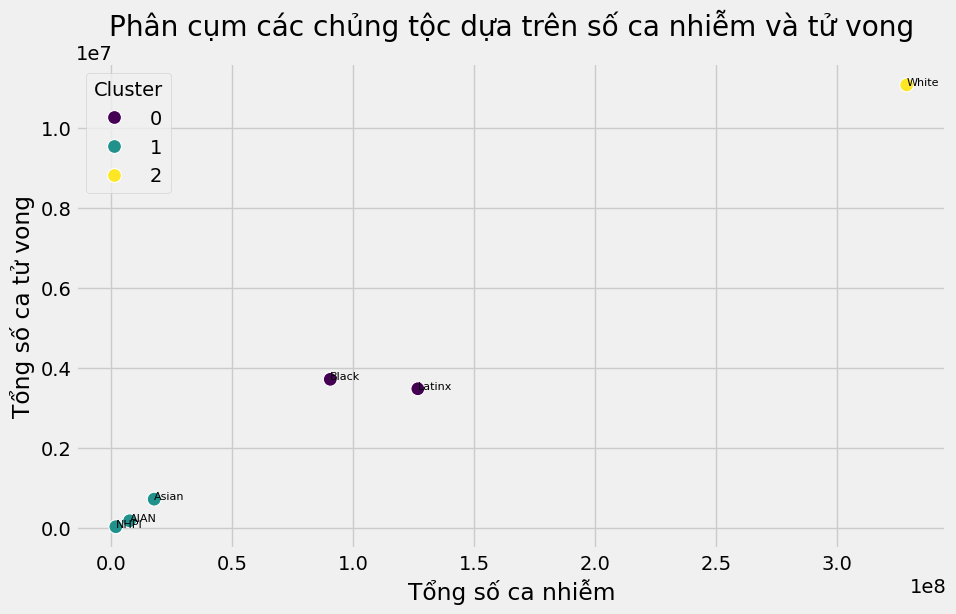

In [27]:
# Sử dụng KMeans để phân cụm dữ liệu
from sklearn.cluster import KMeans

# Tạo mô hình KMeans với 2 cụm
kmeans = KMeans(n_clusters=3, random_state=42)
# Phân cụm dữ liệu
cluster_df['Cluster'] = kmeans.fit_predict(cluster_df[['Cases', 'Deaths']])
# Vẽ biểu đồ scatter plot để hiển thị dữ liệu đã phân cụm
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cases', y='Deaths', hue='Cluster', data=cluster_df, palette='viridis', s=100)
# Thêm text để hiển thị tên của từng nhóm chủng tộc
for i in range(cluster_df.shape[0]):
    plt.text(cluster_df['Cases'][i], cluster_df['Deaths'][i], cluster_df['Chủng tộc'][i], fontsize=8)
# Đặt tiêu đề và tên trục
plt.title('Phân cụm các chủng tộc dựa trên số ca nhiễm và tử vong')
plt.xlabel('Tổng số ca nhiễm')
plt.ylabel('Tổng số ca tử vong')
plt.show()


$\Longrightarrow$ **Tổng kết:**
- Từ những phân tích trên ta có thể thấy rằng có sự chênh lệch rất lớn về số ca nhiễm và tử vong giữa các nhóm dân tộc ở Mỹ. Nhóm người da trắng `White` luôn chiếm tỷ lệ cao nhất và vượt trội hoàn toàn về số ca nhiễm và tử vong so với các chủng tộc `POCs`.
- Đi sâu hơn vào các chủng tộc `POCs`, bằng việc sử dụng chỉ số `POCDR` và phương pháp phân cụm bằng `K-means` dựa trên số ca nhiễm và tử vong, ta có thể thấy được sự tương đồng lớn giữa `Latinx` và `Black` với nhau, nhóm còn lại là bao gồm 3 chủng tộc: `Asian`, `AIAN` và `NHPI`. Với điều này, tính đúng đắn của giả thuyết: `Sự khác biệt về số ca nhiễm xác nhận và tỷ lệ tử vong giữa các nhóm chủng tộc trên khắp Hoa Kỳ là đáng kế` càng được củng cố chắc chắn hơn.

### 5. Phân tích sự ảnh hưởng của các chính sách xã hội của các bang đến tình hình COVID-19 tại Mỹ

Trong đại dịch COVID-19 được ghi nhận trong hai năm 2020 và 2021 tại Mỹ rất nhiều các chính sách được chính phủ Mỹ ban hành. Và tác động của các yếu tố chính trị và chính sách đối với số ca bệnh và tử vong của đất nước được thảo luận tiếp theo bằng cách đánh giá sự phân phối của số ca nhiễm và tử vong qua các chính sách được ban hành tại thời điểm đó. Từ đó chúng ta có giả thuyết rằng `liệu sự kiểm soát của đảng chính trị và các chính sách chính phủ có ảnh hưởng đến tỷ lệ ca nhiễm và tử vong giữa các nhóm chủng tộc ở Mỹ hay không?`

##### 5.1 Tải tập dữ liệu

In [28]:
# Đọc dữ liệu COVID-19 và dữ liệu chính sách từ các tệp CSV
covid_data_path = './CRDT_Data.csv'
policy_data_path = './Policies_Social_COVID_19.xlsx'
covid_data = pd.DataFrame(pd.read_csv(covid_data_path))
policy_data = pd.DataFrame(pd.read_excel(policy_data_path))


##### 5.2 Mô tả dữ liệu và lấy ra bang có số lượng ca nhiễm cao nhất để kiểm dịnh giả thuyết

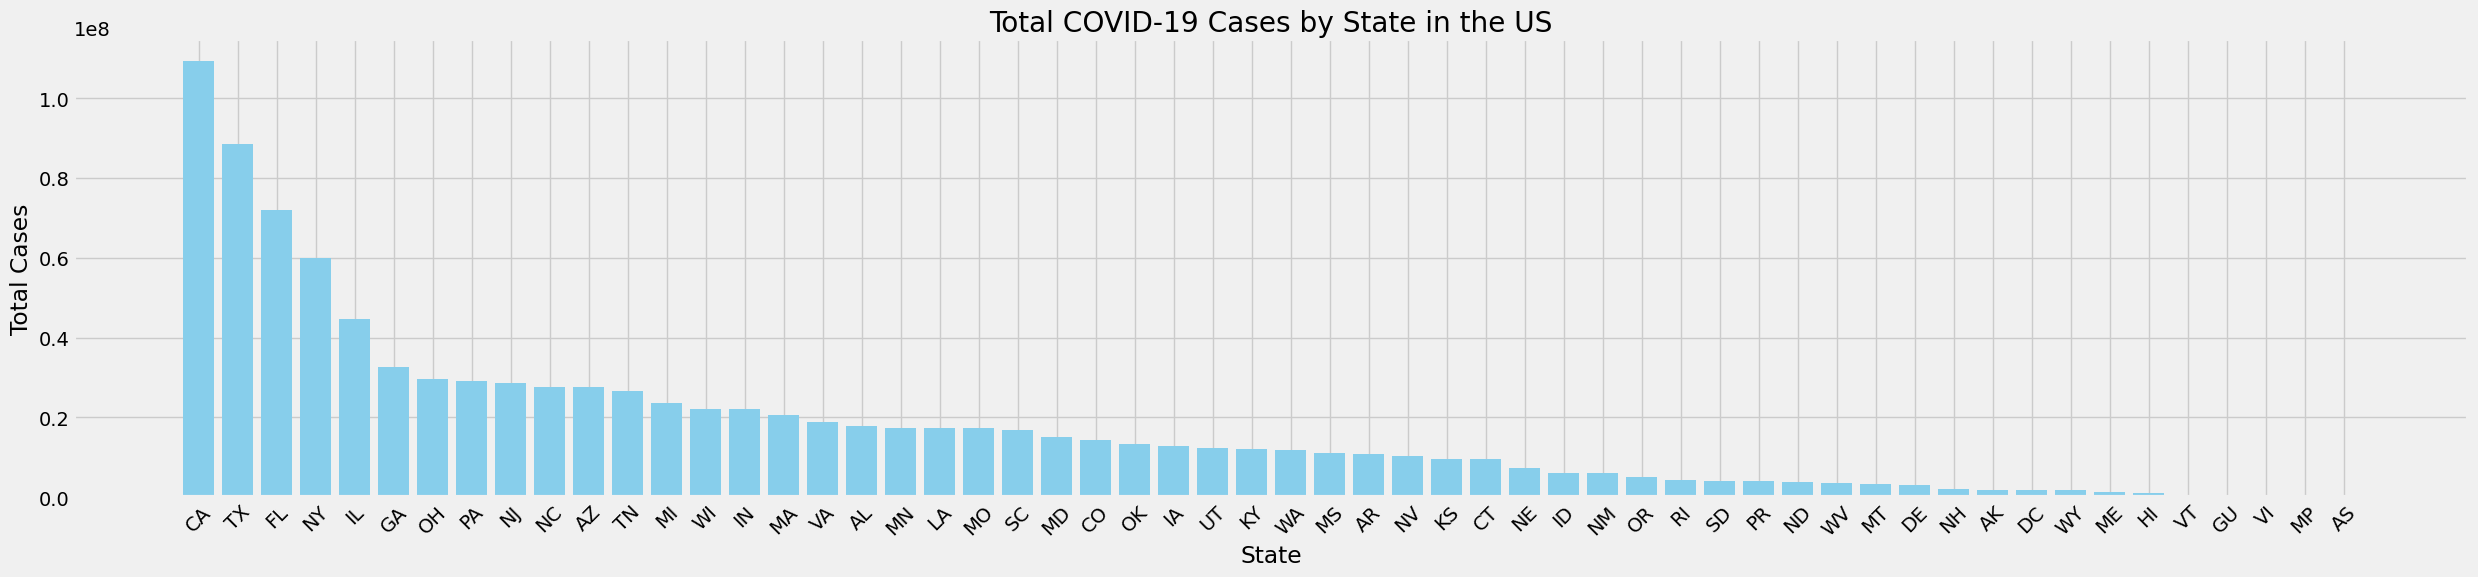

In [29]:
# Nhóm theo 'State' và tính tổng của 'cases_total' và 'deaths_total'
totals_by_state = covid_data.groupby('State')[['Cases_Total']].sum().reset_index()

# Sắp xếp 'Cases_Total' theo chiều giảm dần
totals_by_state_sorted = totals_by_state.sort_values(by='Cases_Total', ascending=False)

# Visualize
plt.figure(figsize=(25, 6))
plt.bar(totals_by_state_sorted['State'], totals_by_state_sorted['Cases_Total'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Total Cases')
plt.title('Total COVID-19 Cases by State in the US')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [30]:
policy_data[["POSTCODE", "FM_ALL",	"FM_END",	"CLREST",	"ENDREST",	"CLRST2", "ENDREST2", "CLMOVIE",	"END_MOV",	"CLOSEBAR",	"END_BRS"]].head()

,POSTCODE,FM_ALL,FM_END,CLREST,ENDREST,CLRST2,ENDREST2,CLMOVIE,END_MOV,CLOSEBAR,END_BRS
0,State Abbreviation,Face mask mandate in public spaces,Ended face mask mandate,Closed restaurants except take out,Reopen restaurants,Closed restaurants (x2),Reopened restaurants (x2),Closed movie theaters,Reopened movie theaters,Closed Bars,Reopen bars
1,NaN,masks,masks,physical_distance_closures,reopening,second_closures,second_closures,physical_distance_closures,reopening,physical_distance_closures,reopening
2,note,start,end,start,end,start,end,start,end,start,end
3,text,date,date,date,date,date,date,date,date,date,date
4,AL,2020-07-16 00:00:00,2021-04-09 00:00:00,2020-03-19 00:00:00,2020-05-11 00:00:00,0,0,2020-03-28 00:00:00,2020-05-22 00:00:00,2020-03-19 00:00:00,2020-05-11 00:00:00


**Nhận xét tổng thể:**
- Dựa vào biểu đồ trên, ta thấy rằng số ca nhiễm của bang California (CA) là vượt trội rất lớn so với những bang còn lại.

- Dựa theo bảng dữ liệu chính sách ở trên ta thấy rằng mỗi bang ở đại dịch COVID-19 ở Mỹ sẽ có thời gian ban hành các chính sách khác nhau.

$\Longrightarrow$ Từ đó ta có thể dựa vào các chính sách từ bang CA này để chứng minh giả thuyết trên.

##### 5.3 Tiền xử lý dữ liệu

In [31]:
# Định dạng lại thành chuỗi "dd-mm-yyyy" và lấp đầy các khoảng trống dữ liệu
covid_data['Date'] = pd.to_datetime(covid_data['Date'], format='%Y%m%d')
covid_data = covid_data.sort_values('Date')
covid_data.fillna(0)
policy_data.replace('0', pd.NaT, inplace=True)

In [32]:
# Lấy các dòng có giá trị cột "state" là 'CA'
ca_policy_data = policy_data[policy_data['POSTCODE'] == 'CA']
ca_covid_data = covid_data[covid_data['State'] == 'CA']
ca_policy_data

,STATE,POSTCODE,FIPS,FM_ALL,FM_END,CLREST,ENDREST,CLRST2,ENDREST2,CLMOVIE,END_MOV,CLOSEBAR,END_BRS,POPDEN21,HMLS21,MH21
8,California,CA,6,2020-06-18 00:00:00,2022-03-01 00:00:00,2020-03-16 00:00:00,2020-05-18 00:00:00,2020-07-13 00:00:00,2021-04-15 00:00:00,2020-03-19 00:00:00,2021-04-15 00:00:00,2020-03-16 00:00:00,2021-06-15 00:00:00,251.9,181399,356.2


In [33]:
start_date_mask = pd.to_datetime(ca_policy_data['FM_ALL'].iloc[0]).date()
end_date_mask = pd.to_datetime(ca_policy_data['FM_END'].iloc[0]).date()
print(f"Ngày bắt dầu thực hiện chính sách đeo khẩu trang của bang California tại Hoa Kỳ là: {start_date_mask}")
print(f"Ngày kết thúc thực hiện chính sách đeo khẩu trang của bang Californi tại Hoa Kỳ là: {end_date_mask}")

Ngày bắt dầu thực hiện chính sách đeo khẩu trang của bang California tại Hoa Kỳ là: 2020-06-18
Ngày kết thúc thực hiện chính sách đeo khẩu trang của bang Californi tại Hoa Kỳ là: 2022-03-01


In [34]:
start_date_restaurant = pd.to_datetime(ca_policy_data['CLREST'].iloc[0]).date()
end_date_restaurant = pd.to_datetime(ca_policy_data['ENDREST'].iloc[0]).date()
print(f"Ngày bắt dầu thực hiện chính sách đóng cửa nhà hàng ngoại trừ mang đi của bang California tại Hoa Kỳ là: {start_date_restaurant}")
print(f"Ngày kết thúc thực hiện chính sách đóng cửa nhà hàng của bang California tại Hoa Kỳ là: {end_date_restaurant}")

Ngày bắt dầu thực hiện chính sách đóng cửa nhà hàng ngoại trừ mang đi của bang California tại Hoa Kỳ là: 2020-03-16
Ngày kết thúc thực hiện chính sách đóng cửa nhà hàng của bang California tại Hoa Kỳ là: 2020-05-18


In [35]:
start_date_restaurant2 = pd.to_datetime(ca_policy_data['CLRST2'].iloc[0]).date()
end_date_restaurant2 = pd.to_datetime(ca_policy_data['ENDREST2'].iloc[0]).date()
print(f"Ngày bắt dầu thực hiện chính sách đóng cửa nhà hàng ngoại trừ mang đi lần 2 của bang California tại Hoa Kỳ là: {start_date_restaurant2}")
print(f"Ngày kết thúc thực hiện chính sách đóng cửa nhà hàng lần 2 của bang California tại Hoa Kỳ là: {end_date_restaurant2}")

Ngày bắt dầu thực hiện chính sách đóng cửa nhà hàng ngoại trừ mang đi lần 2 của bang California tại Hoa Kỳ là: 2020-07-13
Ngày kết thúc thực hiện chính sách đóng cửa nhà hàng lần 2 của bang California tại Hoa Kỳ là: 2021-04-15


In [36]:
start_date_movie = pd.to_datetime(ca_policy_data['CLMOVIE'].iloc[0]).date()
end_date_movie = pd.to_datetime(ca_policy_data['END_MOV'].iloc[0]).date()
print(f"Ngày bắt dầu thực hiện chính sách đóng rạp chiếu phim của bang California tại Hoa Kỳ là: {start_date_movie}")
print(f"Ngày kết thúc thực hiện chính sách đóng rạp chiếu phim của bang California tại Hoa Kỳ là: {end_date_movie}")

Ngày bắt dầu thực hiện chính sách đóng rạp chiếu phim của bang California tại Hoa Kỳ là: 2020-03-19
Ngày kết thúc thực hiện chính sách đóng rạp chiếu phim của bang California tại Hoa Kỳ là: 2021-04-15


In [37]:
start_date_bar = pd.to_datetime(ca_policy_data['CLOSEBAR'].iloc[0]).date()
end_date_bar = pd.to_datetime(ca_policy_data['END_BRS'].iloc[0]).date()
print(f"Ngày bắt dầu thực hiện chính sách đóng cửa quán BAR của bang California tại Hoa Kỳ là: {start_date_bar}")
print(f"Ngày kết thúc thực hiện chính sách đóng cửa quán BAR của bang California tại Hoa Kỳ là: {end_date_bar}")

Ngày bắt dầu thực hiện chính sách đóng cửa quán BAR của bang California tại Hoa Kỳ là: 2020-03-16
Ngày kết thúc thực hiện chính sách đóng cửa quán BAR của bang California tại Hoa Kỳ là: 2021-06-15


In [38]:
# Khởi tạo các cột chính sách cho biến ca_covid_data tương ứng với date
ca_covid_data.loc[:, 'mask'] = ca_covid_data['Date'].apply(lambda x: 1 if pd.Timestamp(start_date_mask) <= pd.Timestamp(x) <= pd.Timestamp(end_date_mask) else 0)
ca_covid_data.loc[:, 'restaurant'] = ca_covid_data['Date'].apply(lambda x: 1 if pd.Timestamp(start_date_restaurant) <= pd.Timestamp(x) <= pd.Timestamp(end_date_restaurant) else 0)
ca_covid_data.loc[:, 'restaurant2'] = ca_covid_data['Date'].apply(lambda x: 1 if pd.Timestamp(start_date_restaurant2) <= pd.Timestamp(x) <= pd.Timestamp(end_date_restaurant2) else 0)
ca_covid_data.loc[:, 'bar'] = ca_covid_data['Date'].apply(lambda x: 1 if pd.Timestamp(start_date_bar) <= pd.Timestamp(x) <= pd.Timestamp(end_date_bar) else 0)
ca_covid_data.loc[:, 'movie'] = ca_covid_data['Date'].apply(lambda x: 1 if pd.Timestamp(start_date_movie) <= pd.Timestamp(x) <= pd.Timestamp(end_date_movie) else 0)

**Nhận xét tổng thể:**
- Qua quá trình xử lý dữ liệu ta thu được 2 biến dữ liệu chính là ca_policy_data và ca_covid_data.

- Biến ca_policy_data sẽ bao gồm thời gian của 4 chính sách mà chúng tôi rút trích ra là chính sách đeo khẩu trang, chính sách đóng cửa nhà hàng, quán bar và rạp chiếu phim của bang CA. 

- Biến ca_covid_data sẽ lưu trữ số ca nhiễm và tử vong của các nhóm sắc tộc như là White, Black, Latinx, Asian	AIAN, NHPI của bang CA theo từng thời gian. Đặc biệt, có 5 cột mới mang giá trị nhị phân là 0 và 1 được tạo ra là 'mask', 'restaurant', 'restaurant2', 'bar', 'movie' đại diện cho các chính sách nào được ban hành tại date tương ứng.

- Chính sách đeo khẩu trang sẽ bắt đầu từ ngày 18/06/2020 đến ngày 01/03/2022

- Chính sách đóng cửa nhà hàng sẽ bắt đầu từ ngày 16/03/2020 đến ngày 18/05/2020

- Chính sách đóng cửa nhà hàng lần 2 sẽ bắt đầu từ ngày 13/07/2020 đến ngày 15/04/2021

- Chính sách đóng cửa quán bar sẽ bắt đầu từ ngày 16/03/2020 đến ngày 15/06/2021

- Chính sách đóng cửa rạp chiếu phim sẽ bắt đầu từ ngày 19/03/2020 đến ngày 15/04/2021

##### 5.4 Trực quan hóa dữ liệu

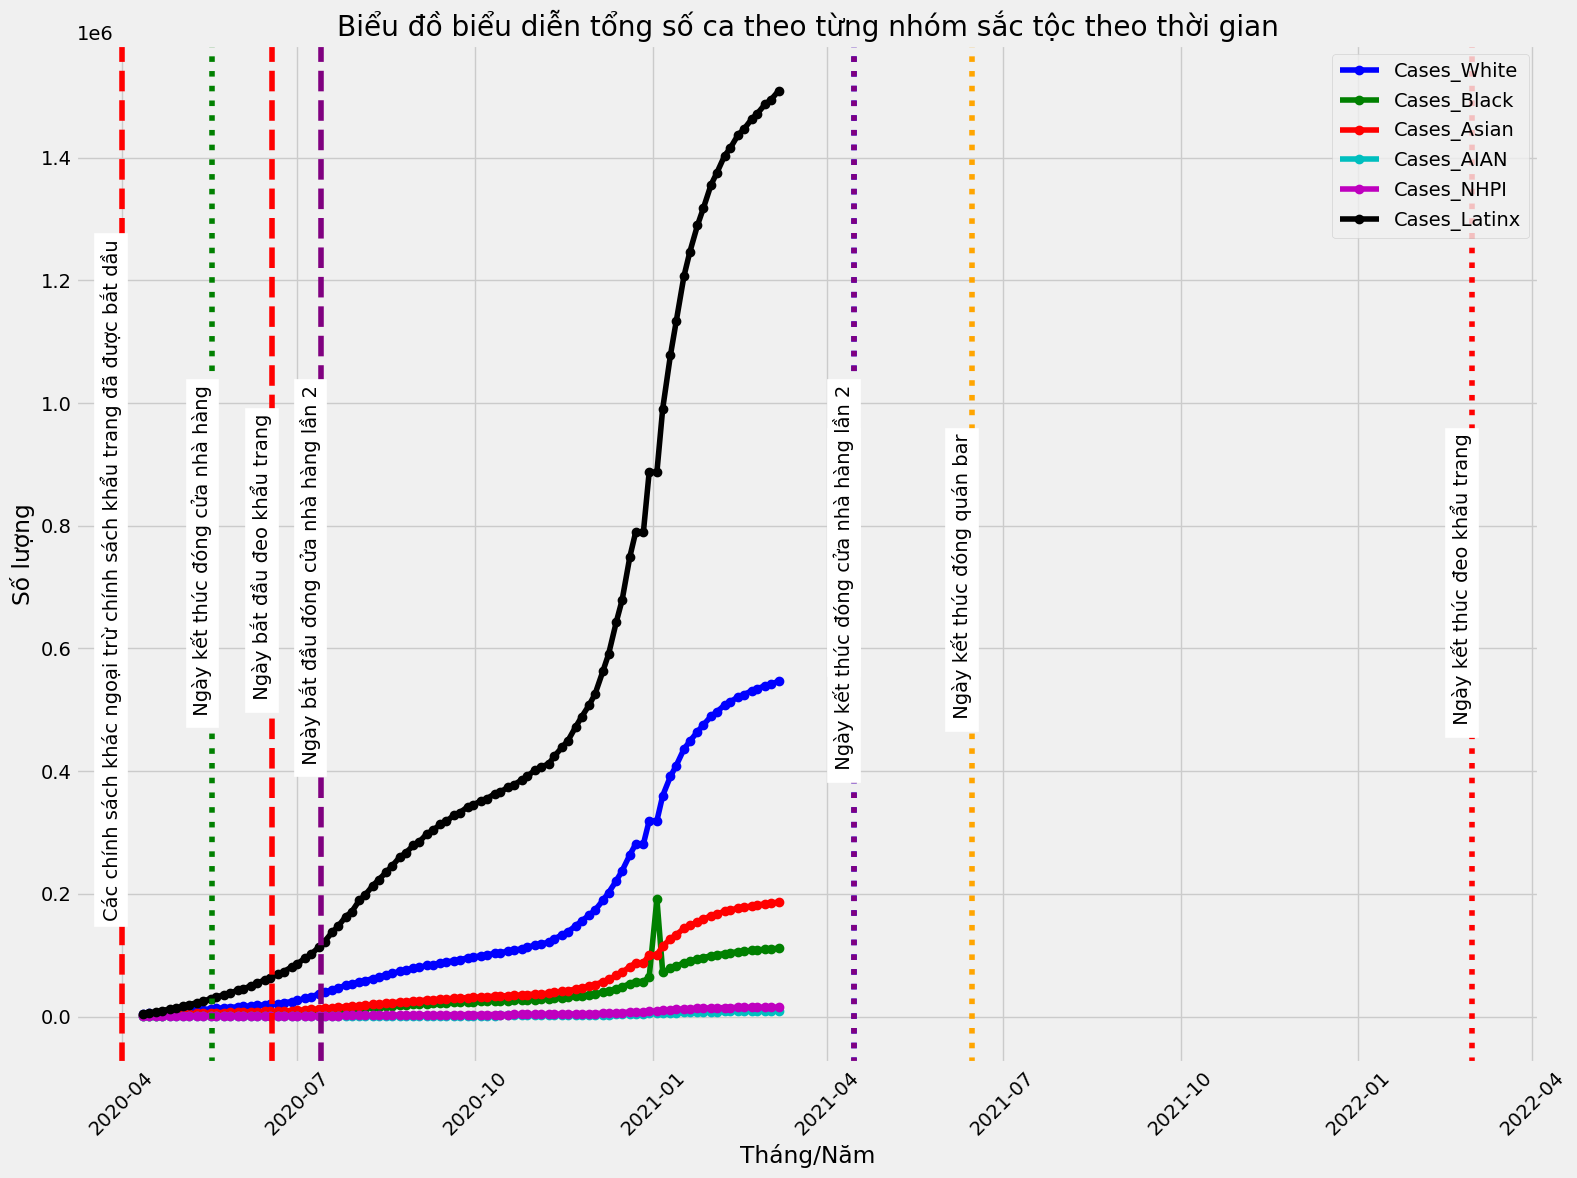

In [39]:
# Biểu đồ cho tổng số ca theo từng nhóm sắc tộc theo thời gian
plt.figure(figsize=(16, 12))

plt.plot(ca_covid_data['Date'], ca_covid_data['Cases_White'], marker='o', linestyle='-', color='b', label='Cases_White')
plt.plot(ca_covid_data['Date'], ca_covid_data['Cases_Black'], marker='o', linestyle='-', color='g', label='Cases_Black')
plt.plot(ca_covid_data['Date'], ca_covid_data['Cases_Asian'], marker='o', linestyle='-', color='r', label='Cases_Asian')
plt.plot(ca_covid_data['Date'], ca_covid_data['Cases_AIAN'], marker='o', linestyle='-', color='c', label='Cases_AIAN')
plt.plot(ca_covid_data['Date'], ca_covid_data['Cases_NHPI'], marker='o', linestyle='-', color='m', label='Cases_NHPI')
plt.plot(ca_covid_data['Date'], ca_covid_data['Cases_Latinx'], marker='o', linestyle='-', color='black', label='Cases_Latinx')

# Chính sách khẩu trang
plt.axvline(x=start_date_mask, color='red', linestyle='--')
plt.axvline(x=end_date_mask, color='red', linestyle=':')
plt.text(start_date_mask, plt.gca().get_ylim()[1]*0.62, ' Ngày bắt đầu đeo khẩu trang', color='k', rotation=90, va='top', ha='right', backgroundcolor='w')
plt.text(end_date_mask, plt.gca().get_ylim()[1]*0.6, ' Ngày kết thúc đeo khẩu trang', color='k', rotation=90, va='top', ha='right', backgroundcolor='w')

# Các chính sách đã được thi hành trước data
plt.axvline(x=pd.to_datetime('04-01-2020').date(), color='red', linestyle='--')
plt.text(pd.to_datetime('04-01-2020').date(), plt.gca().get_ylim()[1]*0.8, 'Các chính sách khác ngoại trừ chính sách khẩu trang đã được bắt dầu', color='k', rotation=90, va='top', ha='right', backgroundcolor='w')

# Chính sách rạp chiếu phim
plt.axvline(x=end_date_movie, color='blue', linestyle=':')
plt.text(end_date_movie, plt.gca().get_ylim()[1]*0.6, ' Ngày kết thúc đóng rạp', color='k', rotation=90, va='top', ha='right', backgroundcolor='w')

# Chính sách nhà hàng
plt.axvline(x=end_date_restaurant, color='green', linestyle=':')
plt.text(end_date_restaurant, plt.gca().get_ylim()[1]*0.65, ' Ngày kết thúc đóng cửa nhà hàng', color='k', rotation=90, va='top', ha='right', backgroundcolor='w')

# Chính sách nhà hàng lần 2
plt.axvline(x=start_date_restaurant2, color='purple', linestyle='--')
plt.axvline(x=end_date_restaurant2, color='purple', linestyle=':')
plt.text(start_date_restaurant2, plt.gca().get_ylim()[1]*0.65, ' Ngày bắt đầu đóng cửa nhà hàng lần 2', color='k', rotation=90, va='top', ha='right', backgroundcolor='w')
plt.text(end_date_restaurant2, plt.gca().get_ylim()[1]*0.65, ' Ngày kết thúc đóng cửa nhà hàng lần 2', color='k', rotation=90, va='top', ha='right', backgroundcolor='w')

# Chính sách quán bar
plt.axvline(x=end_date_bar, color='orange', linestyle=':')
plt.text(end_date_bar, plt.gca().get_ylim()[1]*0.6, ' Ngày kết thúc đóng quán bar', color='k', rotation=90, va='top', ha='right', backgroundcolor='w')

plt.title('Biểu đồ biểu diễn tổng số ca theo từng nhóm sắc tộc theo thời gian')
plt.xlabel('Tháng/Năm')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


**Nhận xét:**

- Dựa theo biểu đồ trên, ta thấy rằng các chính sách được ban hanh rất nhiều và có 3 chính sách được ban hành trước thời điểm dữ liệu COVID-19 mà chúng em đang xét là chính sách đóng cửa nhà hàng, quán bar và rạp chiếu phim. Nhưng gần như vẫn không thể kiểm soát nổi được dịch bệnh bùng phát mạnh trong năm 2020 và 2021 tại bang CA của Mỹ. 

- Đặc biệt, ta có thể để ý thấy rằng ngay thời điểm chính sách đóng cửa nhà hàng kết thúc cũng chính là thời điểm mà dịch bệnh bắt đầu bùng phát rất mạnh và nhanh. Điều đó cũng cho thấy chính sách đóng cửa nhà hàng cần được ban hành tiếp tục tại thời điểm đó. Vì vậy vào khoảng tháng 7 nằm 2020 chính sách đóng cửa nhà hàng lần 2 gấp rút được công bố và áp dụng mãi đến năm 2021.

- Sau lệnh mở cửa nhà hàng thì dịch bùng phát mạnh mẽ và lệnh đeo khẩu trang được ban hành rất nhanh và chính sách này rất hữu dụng và cần thiết mãi được thi hành đến tháng 3 năm 2022.

- Hai chính sách còn lại là đóng cửa rạp chiếu phim và quán bar được thực hiện rất sớm và thời gian kết thúc chính sách này nằm sau khoảng thời gian dữ liệu COVID-19 được ghi nhận ở đây. Điều đó, cũng cho thấy rằng 2 chính sách này cũng rất cần thiết và cần được thi hành lâu dài. 

- Trong biểu đồ ta thấy rằng nhóm sắc tộc bùng phát mạnh nhất là Latinx, tiếp theo là White, tiếp đến là Asian, Black, NHPI và cuối cùng là AIAN.

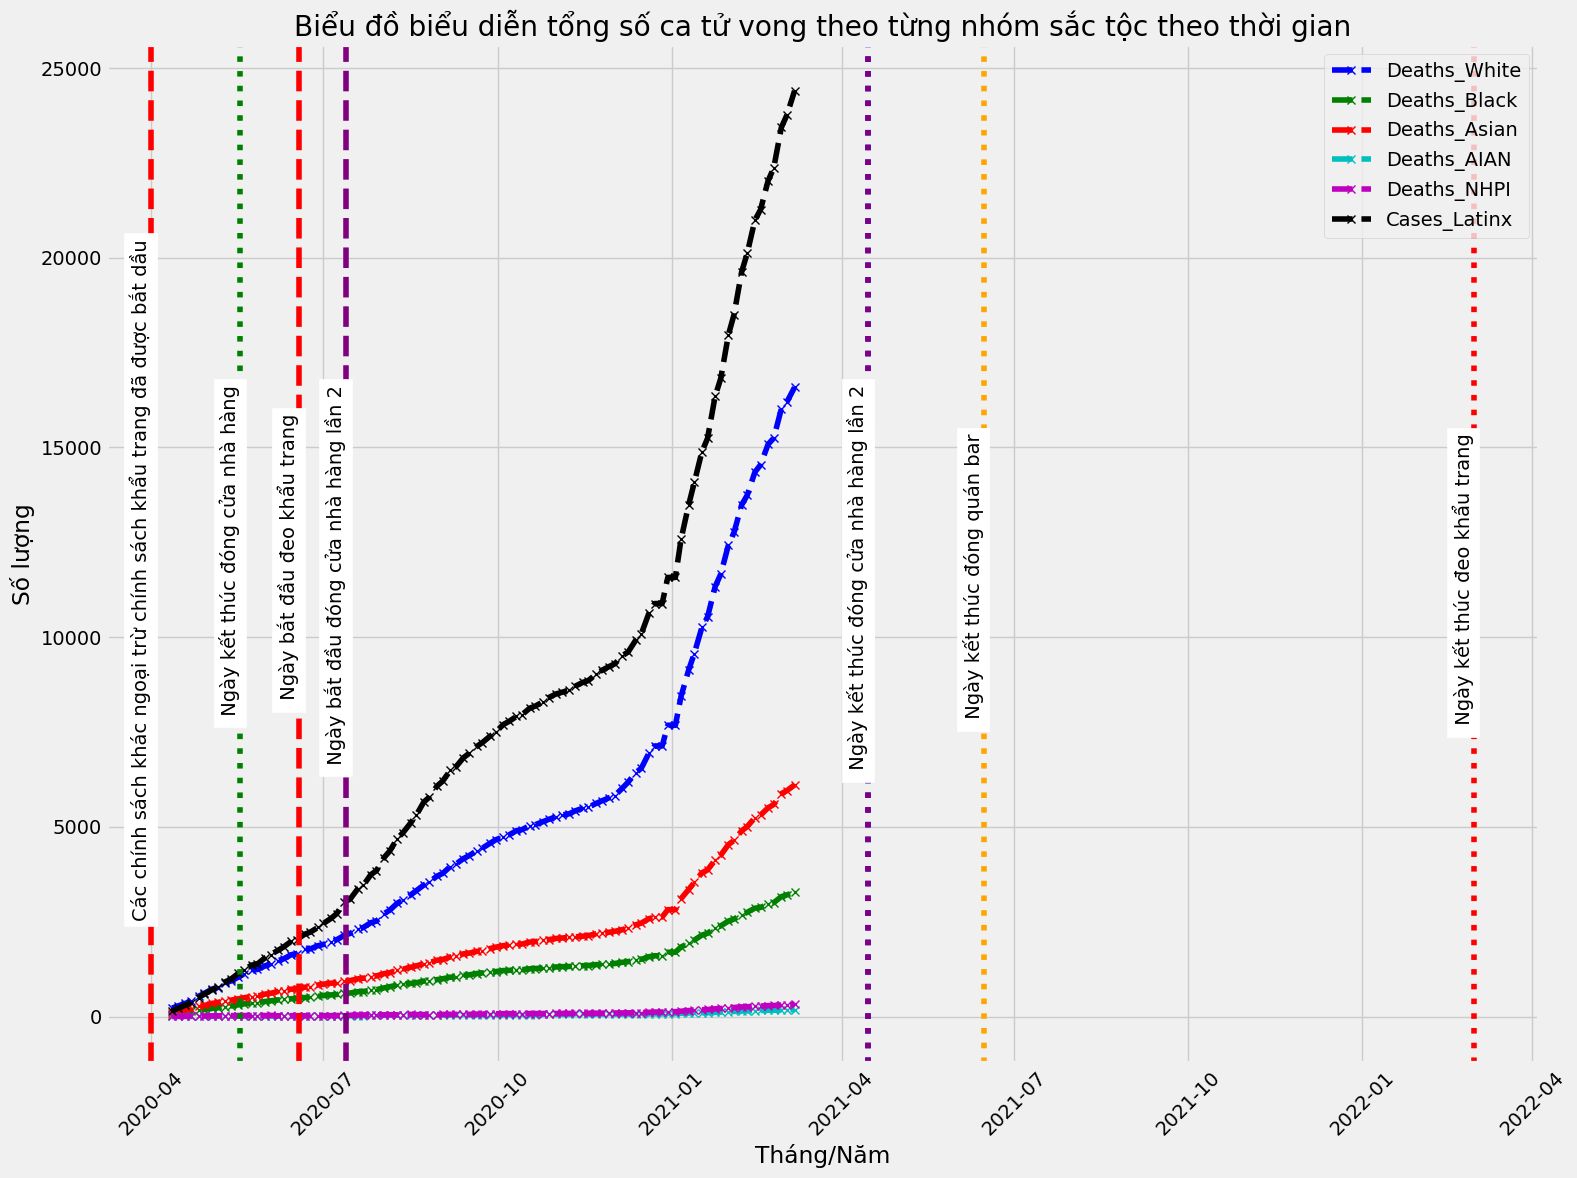

In [40]:
# Biểu đồ cho tổng số ca tử vong theo từng nhóm sắc tộc theo thời gian
plt.figure(figsize=(16, 12))

plt.plot(ca_covid_data['Date'], ca_covid_data['Deaths_White'], marker='x', linestyle='--', color='b', label='Deaths_White')
plt.plot(ca_covid_data['Date'], ca_covid_data['Deaths_Black'], marker='x', linestyle='--', color='g', label='Deaths_Black')
plt.plot(ca_covid_data['Date'], ca_covid_data['Deaths_Asian'], marker='x', linestyle='--', color='r', label='Deaths_Asian')
plt.plot(ca_covid_data['Date'], ca_covid_data['Deaths_AIAN'], marker='x', linestyle='--', color='c', label='Deaths_AIAN')
plt.plot(ca_covid_data['Date'], ca_covid_data['Deaths_NHPI'], marker='x', linestyle='--', color='m', label='Deaths_NHPI')
plt.plot(ca_covid_data['Date'], ca_covid_data['Deaths_Latinx'], marker='x', linestyle='--', color='black', label='Cases_Latinx')

# Chính sách khẩu trang
plt.axvline(x=start_date_mask, color='red', linestyle='--')
plt.axvline(x=end_date_mask, color='red', linestyle=':')
plt.text(start_date_mask, plt.gca().get_ylim()[1]*0.62, ' Ngày bắt đầu đeo khẩu trang', color='k', rotation=90, va='top', ha='right', backgroundcolor='w')
plt.text(end_date_mask, plt.gca().get_ylim()[1]*0.6, ' Ngày kết thúc đeo khẩu trang', color='k', rotation=90, va='top', ha='right', backgroundcolor='w')

# Các chính sách đã được thi hành trước data
plt.axvline(x=pd.to_datetime('04-01-2020').date(), color='red', linestyle='--')
plt.text(pd.to_datetime('04-01-2020').date(), plt.gca().get_ylim()[1]*0.8, 'Các chính sách khác ngoại trừ chính sách khẩu trang đã được bắt dầu', color='k', rotation=90, va='top', ha='right', backgroundcolor='w')

# Chính sách rạp chiếu phim
plt.axvline(x=end_date_movie, color='blue', linestyle=':')
plt.text(end_date_movie, plt.gca().get_ylim()[1]*0.6, ' Ngày kết thúc đóng rạp', color='k', rotation=90, va='top', ha='right', backgroundcolor='w')

# Chính sách nhà hàng
plt.axvline(x=end_date_restaurant, color='green', linestyle=':')
plt.text(end_date_restaurant, plt.gca().get_ylim()[1]*0.65, ' Ngày kết thúc đóng cửa nhà hàng', color='k', rotation=90, va='top', ha='right', backgroundcolor='w')

# Chính sách nhà hàng lần 2
plt.axvline(x=start_date_restaurant2, color='purple', linestyle='--')
plt.axvline(x=end_date_restaurant2, color='purple', linestyle=':')
plt.text(start_date_restaurant2, plt.gca().get_ylim()[1]*0.65, ' Ngày bắt đầu đóng cửa nhà hàng lần 2', color='k', rotation=90, va='top', ha='right', backgroundcolor='w')
plt.text(end_date_restaurant2, plt.gca().get_ylim()[1]*0.65, ' Ngày kết thúc đóng cửa nhà hàng lần 2', color='k', rotation=90, va='top', ha='right', backgroundcolor='w')

# Chính sách quán bar
plt.axvline(x=end_date_bar, color='orange', linestyle=':')
plt.text(end_date_bar, plt.gca().get_ylim()[1]*0.6, ' Ngày kết thúc đóng quán bar', color='k', rotation=90, va='top', ha='right', backgroundcolor='w')

plt.title('Biểu đồ biểu diễn tổng số ca tử vong theo từng nhóm sắc tộc theo thời gian')
plt.xlabel('Tháng/Năm')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

**Nhận xét:**

Ta thấy rằng biểu đồ tử vong ở đây có hình dạng như biểu đồ số ca nhiễm ở trên. Điều đó có thể khẳng định dịch bùng phất rất nhanh và các chính sách cũng không thể kiểm soát nổi tại thời điểm đó. Những người bị nhiếm bệnh tại thời điểm đó có nguy cơ chết rất cao.

##### 5.5 Áp dụng phương pháp hồi quy tuyến tính

In [41]:
# Chọn dữ liệu để làm biến độc lập (X) và biến phụ thuộc (y)
X = ca_covid_data[['mask', 'restaurant', 'restaurant2', 'bar', 'movie']]
y = ca_covid_data['Cases_Total']

# Thêm hệ số chặn (intercept) vào biến độc lập
X = sm.add_constant(X)

# Huấn luyện mô hình OLS
model_case = sm.OLS(y, X).fit()

# In kết quả của mô hình
print(model_case.summary())

# Dự đoán và đánh giá mô hình
y_pred_case = model_case.predict(X)
mse_case = mean_squared_error(y, y_pred_case)
r2_case = r2_score(y, y_pred_case)

print(f'Mask + Restaurant + Restaurant2 + Bar + Movie -> Cases: MSE = {mse_case:.2f}, R2 = {r2_case:.2f}')


                            OLS Regression Results                            
Dep. Variable:            Cases_Total   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     15.45
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           3.33e-08
Time:                        09:40:30   Log-Likelihood:                -1438.3
No. Observations:                  95   AIC:                             2885.
Df Residuals:                      91   BIC:                             2895.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
mask         1.203e+05   4.69e+05      0.257      

**NHẬN XÉT**

- Giá trị $R^2$ rất thấp cho thấy mô hình này không thực sự tốt để dự đoán số ca nhiễm.

- Ta thấy rằng các biến khác đều có hệ số coef dương ngoại trừ biến restaurant. Lý do là trong lúc tình hình dịch bệnh bùng phát mạnh mẽ và tăng dữ dội thì chính sách này lại không được ban hành. Dẫn tới sự trái ngược nhau nên mang hệ số âm. Điều này cũng chứng tỏ việc ban hành chính sách nhà hàng là rất cần thiết để số ca nhiễm giảm. 

- Trong các biến trên thì biến có thể tin tưởng nhất và có ý nghĩa nhất là restaurant2 vì có P-value thấp. Còn các biến còn lại không thật sự có ý nghĩa. Điều đó cũng chứng tỏ rằng việc mở lại chính sách đóng cửa nhà hàng thật sự rất quan trọng. Còn các chính sách khác vẫn đang được thực thi trong lúc dịch tăng mạnh nên không thấy rõ sự ảnh hưởng của nó.

In [42]:
# Chọn dữ liệu để làm biến độc lập (X) và biến phụ thuộc (y)
X = ca_covid_data[['mask', 'restaurant', 'restaurant2', 'bar', 'movie']]
y = ca_covid_data['Deaths_Total']

# Thêm hệ số chặn (intercept) vào biến độc lập
X = sm.add_constant(X)

# Huấn luyện mô hình OLS
model_case = sm.OLS(y, X).fit()

# In kết quả của mô hình
print(model_case.summary())

# Dự đoán và đánh giá mô hình
y_pred_case = model_case.predict(X)
mse_case = mean_squared_error(y, y_pred_case)
r2_case = r2_score(y, y_pred_case)

print(f'Mask + Restaurant + Restaurant2 + Bar + Movie -> Deaths: MSE = {mse_case:.2f}, R2 = {r2_case:.2f}')


                            OLS Regression Results                            
Dep. Variable:           Deaths_Total   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     18.93
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           1.27e-09
Time:                        09:40:30   Log-Likelihood:                -1017.9
No. Observations:                  95   AIC:                             2044.
Df Residuals:                      91   BIC:                             2054.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
mask         1795.6508   5609.641      0.320      

**NHẬN XÉT**

- Giá trị R2 rất thấp cho thấy mô hình này không thực sự tốt để dự đoán số ca tử vong.

- Ta thấy rằng các biến khác đều có hệ số coef dương ngoại trừ biến restaurant. Lý do là trong lúc tình hình dịch bệnh bùng phát mạnh mẽ và tăng dữ dội thì chính sách này lại không được ban hành. Dẫn tới sự trái ngược nhau nên mang hệ số âm. Điều này cũng chứng tỏ việc ban hành chính sách nhà hàng là rất cần thiết để số ca tử vong giảm. 

- Trong các biến trên thì biến có thể tin tưởng nhất và có ý nghĩa nhất là restaurant2 vì có P-value thấp. Còn các biến còn lại không thật sự có ý nghĩa. Điều đó cũng chứng tỏ rằng việc mở lại chính sách đóng cửa nhà hàng thật sự rất quan trọng. Còn các chính sách khác vẫn đang được thực thi trong lúc dịch tăng mạnh nên không thấy rõ sự ảnh hưởng của nó.

##### 5.6 Kết luận giả thuyết
 
Từ những phân tích trên ta thấy rằng sự bùng nở dịch bệnh của hai năm 2021 và 2021 là rất nhanh và lớn mạnh nên sự kiểm soát của đảng chính trị và các chính sách chính phủ có ảnh hưởng khá thấp đến tỷ lệ ca nhiễm và tử vong giữa các nhóm dân tộc tại thời điểm đó do không kịp thời ngăn chặn. Tuy nhiên, ta cũng có thể thấy sự tác động không nhỏ của việc ban hành các chính sách kịp thời của các chính phủ để phòng ngừa nguy cơ lấy nhiễm và tử vong. Ta có thể thấy rõ hơn các chính sách ảnh hưởng rõ rệt hơn qua các bài báo đã đươc công bố trên các trang uy tín như là [Impact of COVID-19 on the United States Economy and the Policy Response](https://www.un-ilibrary.org/content/books/9789210054331) được đăng trên UN-iLibrary. Tóm lại thì trong thời kì căng thẳng nhất của đại dịch COVID-19, các bang khắp nước Mỹ đã nỗ lực ban hành rất nhiều chính sách để kiểm soát dịch bệnh nhưng hiệu quả thì vẫn rất thấp, số ca nhiễm và tử vong vẫn tăng mạnh mặc dù đôi lúc có giảm nhưng không đáng kể, điều này cho thấy rằng rất có thể việc quản lý và yêu cầu người dân tuân thủ các chính sách diễn ra chưa được hiệu quả cũng như người dân ở đây vẫn chưa thực sự chú trọng đến việc tuân thủ các chính sách phòng chống dịch bệnh.

### 6. Phân tích sự ảnh hưởng của yếu tố con người đến tình hình COVID-19 tại Mỹ 

Trong đại dịch vừa qua, giản cách xã hội luôn là yếu tố quan trọng để có thể nhanh chóng đảy lui đại dịch. Cùng bắt đầu như vậy nhiều ý kiến cho rằng những nơi càng đông dân cư, mật độ dân số càng cao thì khả năng lây nhiễm và tư vong càng lớn. Bên cạnh đó ở một quốc gia mà có tỉ lệ người vô gia cư cao như ở Mỹ thì nhiều ý kiến cũng quan ngại rần số lượng người vô gia cư cao cũng là yếu tố khiến cho dịch bệnh tại Mỹ diễn biến phức tạp và căng thẳng. Một số khác lại cho rằng sức khỏe tinh thần cũng rất quan trọng trong đại dịch và các chuyên gia tâm lí cũng đóng một vai trò hết sức quan trọng trong thời kì khủng hoảng. Vậy chúng ta đặt ra và đi xác thực giả thuyết rằng: `Liệu mật độ dân cư và các yếu tố con người khác của mỗi bang có phải là yếu tố ảnh hưởng lớn đến số ca nhiễm và tỷ lệ tử vong không?`

##### 6.1 Tải tập dữ liệu

In [43]:
# Đọc dataset 1
data1 = pd.read_csv('CRDT_Data.csv', usecols=['State', 'Cases_Total', 'Deaths_Total'])
data1.columns = ['State', 'Cases', 'Deaths']
# Đọc dataset 2
data2 = pd.read_excel('Policies_Social_COVID_19.xlsx', usecols=['POSTCODE', 'POPDEN21', 'HMLS21', 'MH21'])
data2.columns = ['State', 'POPDEN21', 'HMLS21', 'MH21']
data2 = data2.iloc[4:]

##### 6.2 Tiền xử lý dữ liệu

In [44]:
# Tổng hợp dữ liệu theo bang
data1_state = data1.groupby('State')[['Cases', 'Deaths']].sum().reset_index()

# Gộp dữ liệu
merged_data = pd.merge(data1_state, data2, on='State')
merged_data.dropna(subset=['POPDEN21', 'HMLS21', 'MH21', 'Cases', 'Deaths'], inplace=True)

merged_data['POPDEN21'] = pd.to_numeric(merged_data['POPDEN21'], errors='coerce')
merged_data['HMLS21'] = pd.to_numeric(merged_data['HMLS21'], errors='coerce')
merged_data['MH21'] = pd.to_numeric(merged_data['MH21'], errors='coerce')
merged_data['Cases'] = pd.to_numeric(merged_data['Cases'], errors='coerce')
merged_data['Deaths'] = pd.to_numeric(merged_data['Deaths'], errors='coerce')

merged_data.head()

,State,Cases,Deaths,POPDEN21,HMLS21,MH21
0,AK,1855334.0,9027.0,1.28,2614,429.9
1,AL,17861341.0,299052.0,99.52,3304,100.7
2,AR,10837342.0,173269.0,58.16,2609,231.6
3,AZ,27502303.0,552196.0,64.05,14237,132.9
4,CA,109298533.0,1651231.0,251.90,181399,356.2


- Sau quá trình trên ta tạo thành 1 dataset mới từ 2 dataset cũ chứa các cột giá trị:

|Cột|Ý nghĩa|
|---|-------|
|State|Postcode của bang|
|Cases|Số ca dương tính của bang|
|Deaths|Số ca tử vong của bang|
|POPDEN21|Mật độ dân cư năm 2021 của bang|
|HMLS21|Số người vô gia cư năm 2021 của bang|
|MH21| Số lượng chuyên gia về sức khỏe tâm thần trên mỗi 100.000 dân vào năm 2021|

##### 6.3 Mô tả dữ liệu

In [45]:
data_descriptive_stats = merged_data.describe()
data_descriptive_stats

,Cases,Deaths,POPDEN21,HMLS21,MH21
count,5.000000e+01,5.000000e+01,50.000000,50.000000,50.000000
mean,1.934116e+07,4.253429e+05,206.518000,12574.820000,265.862000
std,2.187403e+07,5.551392e+05,274.261603,28801.527673,114.265196
min,3.883060e+05,7.938000e+03,1.280000,532.000000,100.700000
25%,5.323241e+06,6.623500e+04,47.387500,2483.000000,181.350000
50%,1.296777e+07,2.473375e+05,107.955000,4652.000000,244.350000
75%,2.320520e+07,4.942698e+05,222.902500,10087.250000,341.275000
max,1.092985e+08,2.946893e+06,1260.150000,181399.000000,626.600000


**Nhận xét tổng thể:**
- Tổng cộng có 50 quan sát, tương ứng với 5 bang của Mỹ.
- `Cases` và `Deaths` có độ lệch chuẩn cao, cho thấy sự phân phối rộng và biến động lớn trong số ca nhiễm và số ca tử vong giữa các quan sát.
- `POPDEN21` và `HMLS21` cũng có độ lệch chuẩn cao, đặc biệt là `HMLS21`, cho thấy sự khác biệt đáng kể về mật độ dân cư và số người vô gia cư giữa các khu vực.
- `MH21` có độ lệch chuẩn thấp, cho thấy sự ổn định về số lượng chuyên gia về sức khỏe tâm thần giữa các bang. Giá trị trung bình của `MH21` là xấp xỉ `114`, cho thấy trung bình mỗi bang có khoảng 114 chuyên gia về sức khỏe tâm thần trên mỗi 100.000 dân. Đây có thể là một yếu tố quan trọng giúp giảm căng thẳng và tâm lý cho người dân trong thời gian dịch bệnh.
- Các giá trị tại các phân vị 25%, 50% và 75% cho thấy sự phân phối của các biến. Ví dụ, 50% số liệu về số ca nhiễm dưới `12,967,770`, nhưng giá trị 75% lên tới `23,205,200`, chỉ ra rằng có nhiều quan sát có số ca nhiễm cao hơn mức trung vị đáng kể.
- Tương tự, số ca tử vong cũng có sự phân phối rộng, với giá trị 75% là `494,269.8` nhưng giá trị cao nhất lên tới `2,946,893`.
- Các giá trị cực trị (min và max) cho thấy có sự khác biệt lớn giữa các quan sát. Ví dụ, số ca nhiễm tối thiểu là `388,306` trong khi số cao nhất là `109,298,500`, cho thấy sự chênh lệch khá cao giữa các bang

##### 6.4 Trực quan hóa dữ liệu

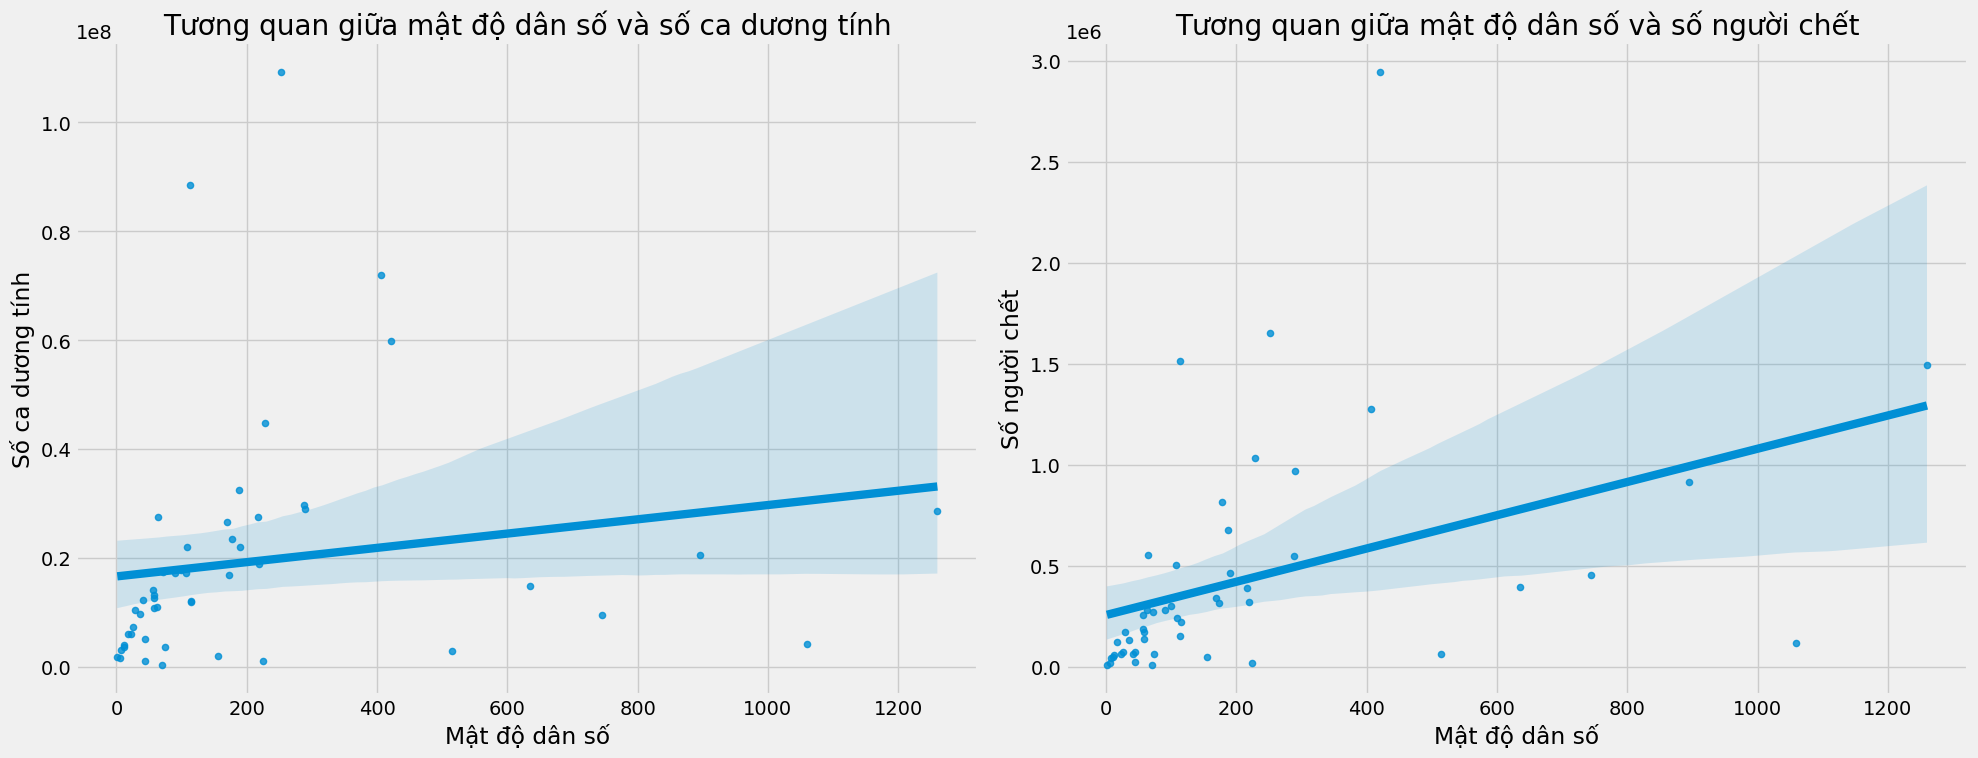

In [46]:
# Tạo một hình với 2 biểu đồ (1 hàng, 2 cột)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Biểu đồ phân tán giữa mật độ dân số và số ca dương tính kèm đường xu thế
sns.regplot(x='POPDEN21', y='Cases', data=merged_data, ax=axes[0], scatter_kws={'s':20})
axes[0].set_title('Tương quan giữa mật độ dân số và số ca dương tính')
axes[0].set_xlabel('Mật độ dân số')
axes[0].set_ylabel('Số ca dương tính')

# Biểu đồ phân tán giữa mật độ dân số và số người chết kèm đường xu thế
sns.regplot(x='POPDEN21', y='Deaths', data=merged_data, ax=axes[1], scatter_kws={'s':20})
axes[1].set_title('Tương quan giữa mật độ dân số và số người chết')
axes[1].set_xlabel('Mật độ dân số')
axes[1].set_ylabel('Số người chết')

plt.tight_layout()
plt.show()


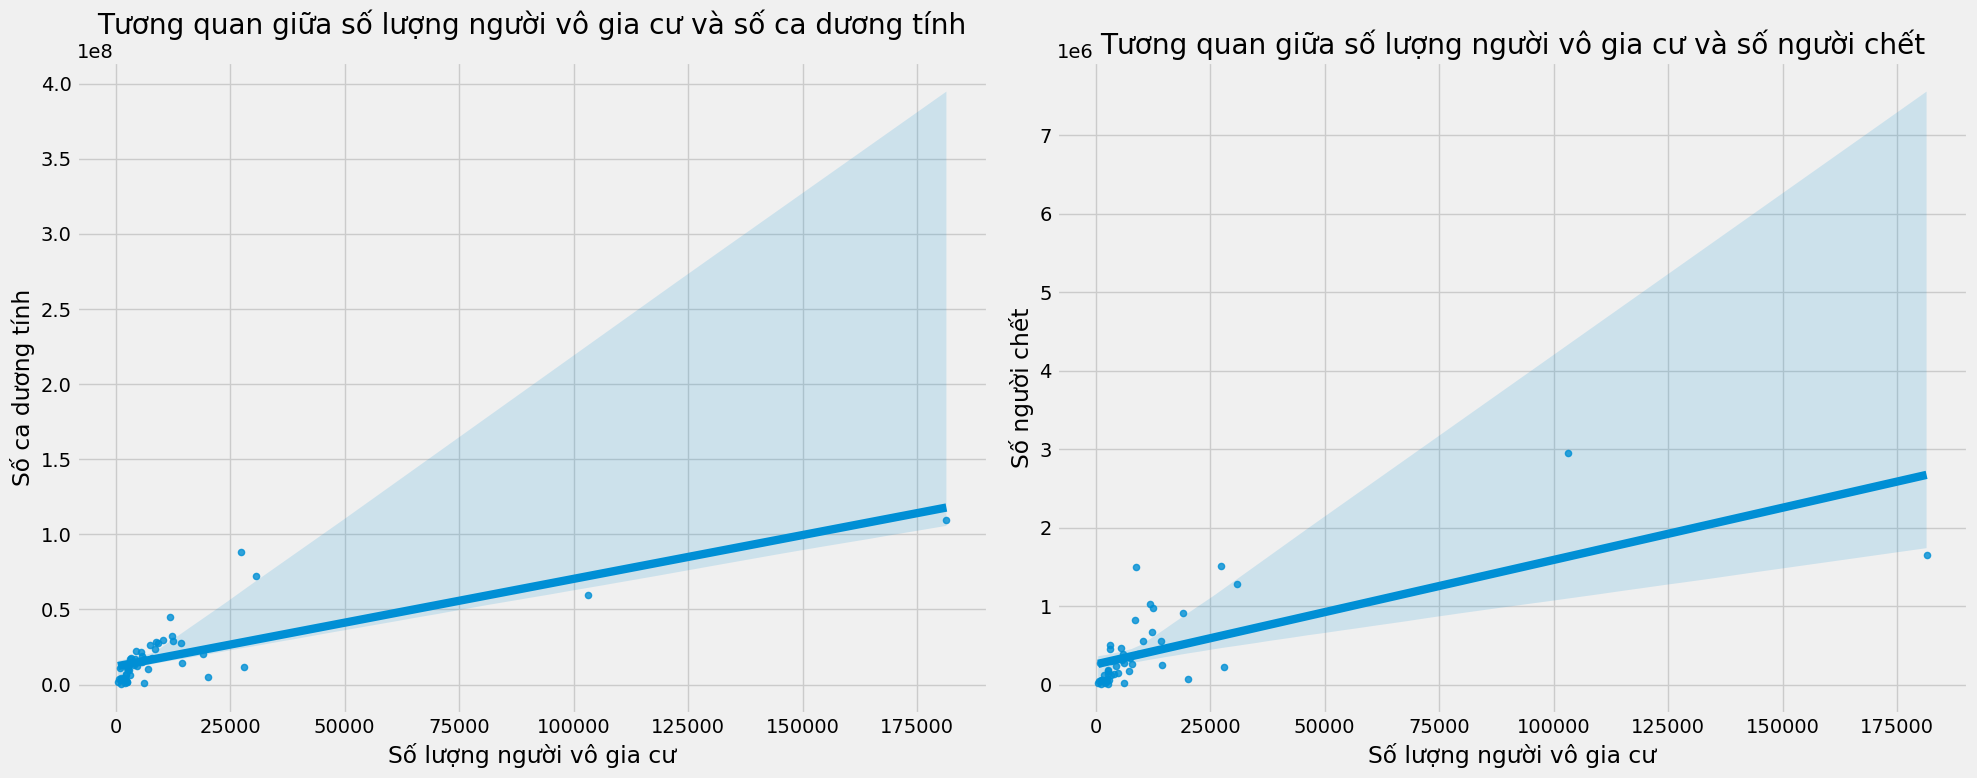

In [47]:
# Tạo một hình với 2 biểu đồ (1 hàng, 2 cột)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Biểu đồ phân tán giữa số lượng người vô gia cư và số ca dương tính kèm đường xu thế
sns.regplot(x='HMLS21', y='Cases', data=merged_data, ax=axes[0], scatter_kws={'s':20})
axes[0].set_title('Tương quan giữa số lượng người vô gia cư và số ca dương tính')
axes[0].set_xlabel('Số lượng người vô gia cư')
axes[0].set_ylabel('Số ca dương tính')

# Biểu đồ phân tán giữa số lượng người vô gia cư à số người chết kèm đường xu thế
sns.regplot(x='HMLS21', y='Deaths', data=merged_data, ax=axes[1], scatter_kws={'s':20})
axes[1].set_title('Tương quan giữa số lượng người vô gia cư và số người chết')
axes[1].set_xlabel('Số lượng người vô gia cư')
axes[1].set_ylabel('Số người chết')

plt.tight_layout()
plt.show()


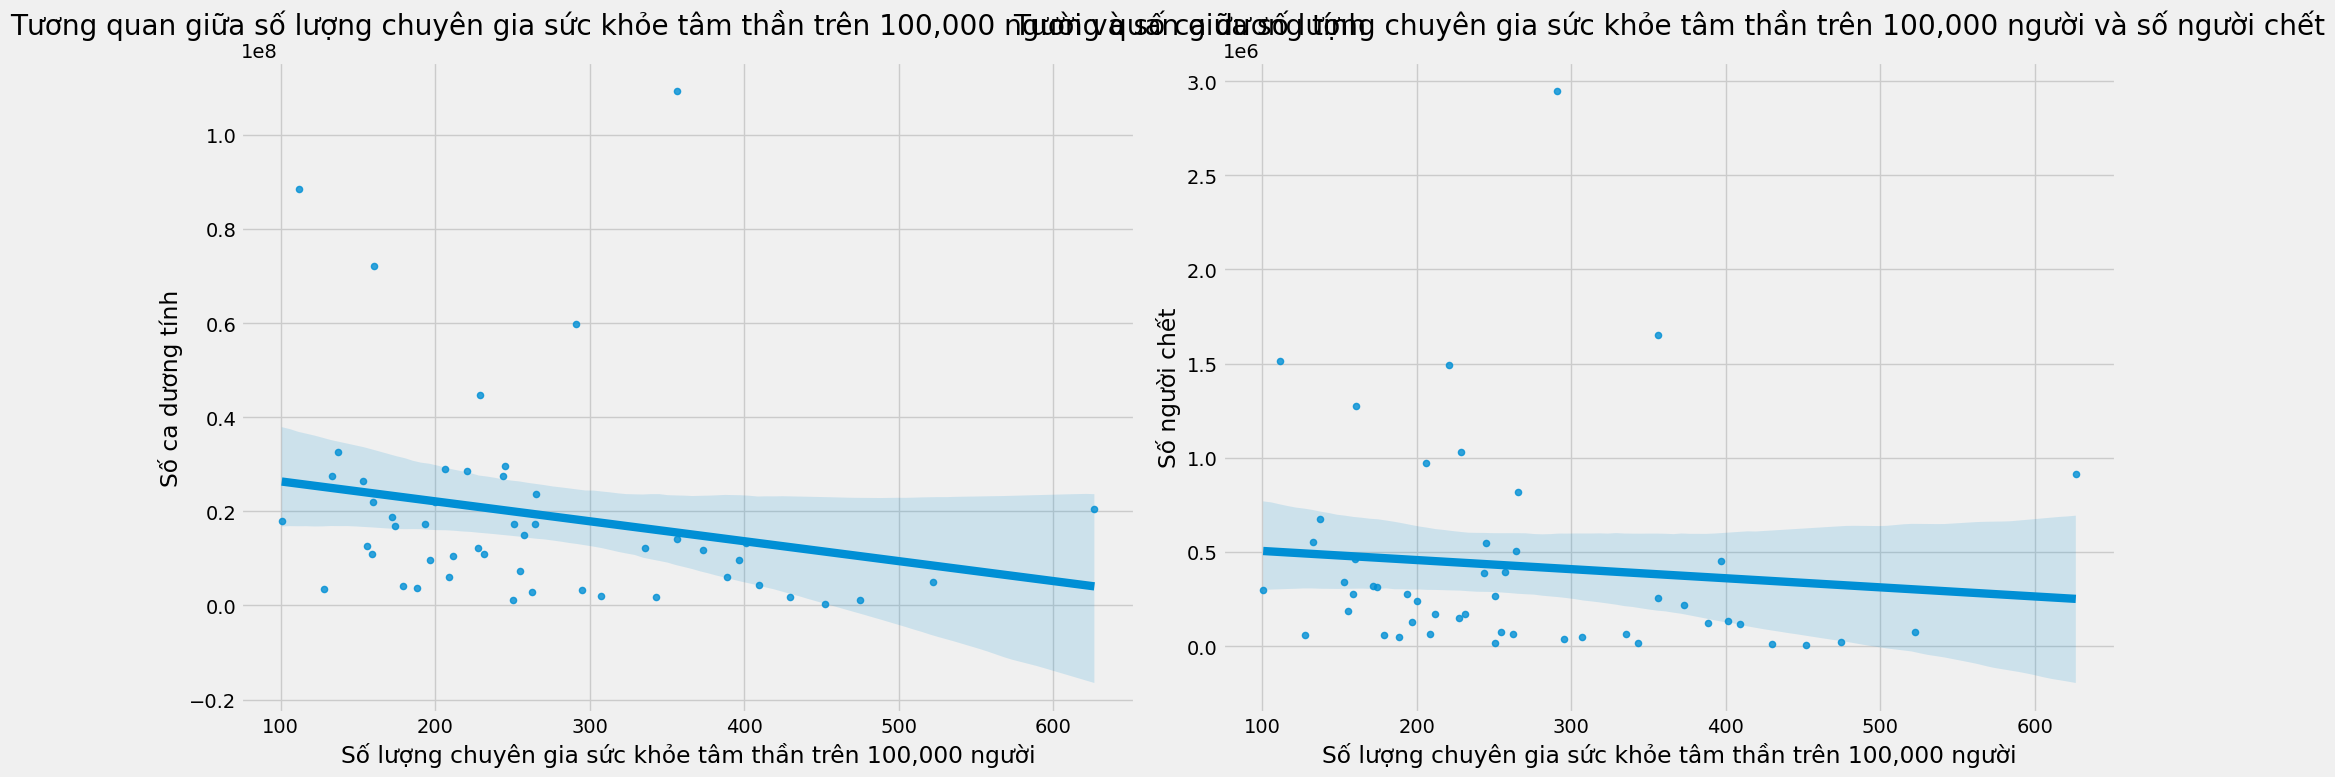

In [48]:
# Tạo một hình với 2 biểu đồ (1 hàng, 2 cột)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Biểu đồ phân tán giữa số lượng chuyên gia sức khỏe trên 100,000 người và số ca dương tính kèm đường xu thế
sns.regplot(x='MH21', y='Cases', data=merged_data, ax=axes[0], scatter_kws={'s':20})
axes[0].set_title('Tương quan giữa số lượng chuyên gia sức khỏe tâm thần trên 100,000 người và số ca dương tính')
axes[0].set_xlabel('Số lượng chuyên gia sức khỏe tâm thần trên 100,000 người')
axes[0].set_ylabel('Số ca dương tính')

# Biểu đồ phân tán giữa số lượng chuyên gia sức khỏe trên 100,000 người và số người chết kèm đường xu thế
sns.regplot(x='MH21', y='Deaths', data=merged_data, ax=axes[1], scatter_kws={'s':20})
axes[1].set_title('Tương quan giữa số lượng chuyên gia sức khỏe tâm thần trên 100,000 người và số người chết')
axes[1].set_xlabel('Số lượng chuyên gia sức khỏe tâm thần trên 100,000 người')
axes[1].set_ylabel('Số người chết')

plt.tight_layout()
plt.show()

**Nhận xét:**
- Dựa vào đường xu thế cũng như sự phân bố của các điểm dữ liệu ta có thể thấy rằng số lượng người vô gia cư càng nhiều thì số ca nhiễm cũng có xu hướng tăng. Điều này càng được thể hiện rõ hơn ở số ca tử vong khi hệ số góc của đường xu hướng lớn hơn. Điều này là dễ hiểu vì người vô gia cư thường không có điều kiện để bảo vệ bản thân khỏi dịch bệnh, họ dễ tiếp xúc với nhiều người khác và không có điều kiện để chăm sóc sức khỏe của mình.
- Trong khi đó ở mật độ dân cư thì cũng có sự tương quan dương với số ca nhiễm và tử vong nhưng lại không được tốt bằng, cụ thể hệ số góc của đường xu hướng nhỏ hơn so với đường xu hướng của số người vô gia cư. Điều này có thể là do mật độ dân cư không phản ánh chính xác số lượng người tiếp xúc với nhau, đặc biệt là ở những nơi có mật độ dân cư cao nhưng có nhiều biện pháp phòng chống dịch bệnh tốt.
- Cuối cùng là số lượng chuyên gia sức khỏe tâm thần, ta thấy rằng số lượng chuyên gia sức khỏe tâm thần càng nhiều thì số ca nhiễm và tử vong càng giảm. Điều này có thể là do sự hỗ trợ tinh thần từ các chuyên gia giúp giảm căng thẳng và lo lắng của người dân, từ đó giúp họ tuân thủ tốt hơn các biện pháp phòng chống dịch bệnh. Đây có thể là một trong những yếu tố quan trọng giúp giảm đi sự ảnh hưởng nặng nề do dịch COVID-19 gây ra tại Mỹ.

##### 6.5 Áp dụng phương pháp hồi quy tuyến tính

In [49]:
# Lấy ra 3 cột
selected_columns = merged_data[['POPDEN21', 'HMLS21', 'MH21', 'Cases', 'Deaths']]

# Chọn dữ liệu để làm biến độc lập (X) và biến phụ thuộc (y)
X = selected_columns[['POPDEN21', 'HMLS21', 'MH21']]
y = selected_columns['Cases']

# Thêm hệ số chặn (intercept) vào biến độc lập
X = sm.add_constant(X)

# Huấn luyện mô hình OLS
model_case = sm.OLS(y, X).fit()

# In kết quả của mô hình
print(model_case.summary())

# Dự đoán và đánh giá mô hình
y_pred_case = model_case.predict(X)
mse_case = mean_squared_error(y, y_pred_case)
r2_case = r2_score(y, y_pred_case)

print(f'POPDEN21 + HMLS21 + MH21 -> Cases: MSE = {mse_case:.2f}, R2 = {r2_case:.2f}')


                            OLS Regression Results                            
Dep. Variable:                  Cases   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     38.18
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           1.53e-12
Time:                        09:40:31   Log-Likelihood:                -884.23
No. Observations:                  50   AIC:                             1776.
Df Residuals:                      46   BIC:                             1784.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.717e+07   4.39e+06      6.186      0.0

$$
\text{Cases} = 27 170 000 + 12200 \times \text{POPDEN21} + 603.4035 \times \text{HMLS21} - 67460 \times \text{MH21}
$$

**NHẬN XÉT**

*1. R-squared và Adjusted R-squared:*
- `R-squared`: 0.713 có nghĩa là 71.3% biến động trong số ca nhiễm Cases được giải thích bởi các biến POPDEN21, HMLS21 và MH21. Đây là một giá trị khá cao, cho thấy mô hình có độ phù hợp tốt.
- `Adjusted R-squared`: 0.695 điều chỉnh cho số lượng biến trong mô hình và thực tế rằng thêm biến vào mô hình sẽ luôn tăng R-squared, điều này cho thấy rằng mô hình vẫn phù hợp tốt với dữ liệu sau khi điều chỉnh.

*2. F-statistic:*
- `F-statistic`: 38.18 với Prob (F-statistic) = 1.53e-10 chỉ ra rằng mô hình tổng thể là có ý nghĩa thống kê. Điều này có nghĩa là ít nhất một trong các biến độc lập (hoặc cả hai) có tác động đáng kể đến biến phụ thuộc Cases.

*3. Biến const:*
- `Coefficient`: 2.717e+07 cho thấy mức cơ bản của số ca nhiễm khi các biến độc lập bằng 0 là rất cao.
- `P-value`: 0.000 cho thấy hệ số chặn này có ý nghĩa thống kê cao.
- `95% CI`: [1.83e+07, 3.6e+07] cho thấy độ tin cậy của ước lượng này.

*4. Biến POPDEN21:*
- `Coefficient`: 12200 chỉ ra rằng mỗi đơn vị tăng thêm trong mật độ dân cư (có thể là người/miles²) sẽ tăng số ca nhiễm thêm khoảng 12200 đơn vị.
- `P-value`: 0.066 cho thấy rằng biến này không có ý nghĩa thống kê (lớn hơn 0.05), do đó không có bằng chứng mạnh mẽ rằng mật độ dân cư ảnh hưởng đến số ca nhiễm.
- `95% CI`: [-1.2e+04, 2.58e+04] cho thấy khoảng tin cậy rất rộng, bao gồm cả giá trị âm và dương, điều này chỉ ra rằng ảnh hưởng của POPDEN18 là không chắc chắn.

*5. Biến HMLS21:*
- `Coefficient`: 693.3318 chỉ ra rằng mỗi người vô gia cư tăng thêm sẽ làm tăng số ca nhiễm thêm khoảng 693 đơn vị.
- `P-value`: 0.000 là cực kỳ nhỏ, cho thấy biến này có ý nghĩa thống kê cao.
- `95% CI`: [528.159, 858.504] là khoảng tin cậy chặt chẽ hơn, cho thấy độ tin cậy cao trong ước lượng.

*6. Biến MH21:*
- `Coefficient`: -67460 chỉ ra rằng mỗi chuyên gia tâm lí tăng thêm sẽ làm tăng số ca nhiễm giảm đi 67460 đơn vị.
- `P-value`: 0.000 là cực kỳ nhỏ, cho thấy biến này có ý nghĩa thống kê cao.
- `95% CI`: [ -9.88e+04, -3.61e+04]  cho thấy độ tin cậy cao trong ước lượng.

In [50]:
# Chọn dữ liệu để làm biến độc lập (X) và biến phụ thuộc (y)
y_deaths = selected_columns['Deaths']

# Huấn luyện mô hình OLS cho biến phụ thuộc là 'Deaths'
model_deaths = sm.OLS(y_deaths, X).fit()

# In kết quả của mô hình
print(model_deaths.summary())

# Dự đoán và đánh giá mô hình
y_pred_deaths = model_deaths.predict(X)
mse_deaths = mean_squared_error(y_deaths, y_pred_deaths)
r2_deaths = r2_score(y_deaths, y_pred_deaths)

print(f'POPDEN21 + HMLS21 + MH21 -> Deaths: MSE = {mse_deaths:.2f}, R2 = {r2_deaths:.2f}')


                            OLS Regression Results                            
Dep. Variable:                 Deaths   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     29.17
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           1.02e-10
Time:                        09:40:31   Log-Likelihood:                -705.15
No. Observations:                  50   AIC:                             1418.
Df Residuals:                      46   BIC:                             1426.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.443e+05   1.22e+05      3.635      0.0

$$
\text{Deaths} = 444300 + 789.1318 \times \text{POPDEN21} + 13.1154 \times \text{HMLS21} - 1304.49 \times \text{MH21}
$$

**NHẬN XÉT**

*1. R-squared và Adjusted R-squared:*
- R-squared: 0.655 có nghĩa là 65.5% biến động trong số ca tử vong Deaths được giải thích bởi các biến POPDEN21, HMLS21 và MH21.
- Adjusted R-squared: 0.633 điều chỉnh cho số lượng biến trong mô hình và vẫn cho thấy mô hình có độ phù hợp tốt.

*2. F-statistic:*
- F-statistic: 29.17 với Prob (F-statistic) = 1.02e-10 chỉ ra rằng mô hình tổng thể là có ý nghĩa thống kê.

*3. Biến const:*
- Coefficient: 4.443e+05 gợi ý rằng số ca tử vong cơ bản là khoảng 4443005 khi các biến độc lập bằng 0.
- P-value: 0.001, nhỏ hơn 0.05, cho thấy hệ số chặn này có ý nghĩa thống kê.
- 95% CI: [1.98e+05, 6.9e+05] cho thấy khoảng tin cậy khá rộng.

*4. Biến POPDEN21:*
- Coefficient: 789.1318 chỉ ra rằng mỗi đơn vị tăng thêm trong mật độ dân cư  sẽ tăng số tử vongthêm khoảng 789 đơn vị.
- P-value: 0.000 có giá trị nhỏ, cho thấy rằng biến này có ý nghĩa thống kê, có thể thấy rằng đã có sự tác động mạnh mẽ của mật độ dân cư đối với số ca tử vong.
- 95% CI: [426.358, 1151.906] là khoảng tin cậy chặt chẽ hơn, cho thấy độ tin cậy cao trong ước lượng.

*5. Biến HMLS21:*
- Coefficient: 13.1154 chỉ ra rằng mỗi người vô gia cư tăng thêm sẽ làm tăng số ca tử vong thêm khoảng 13 đơn vị.
- P-value: 0.000 là cực kỳ nhỏ, cho thấy biến này có ý nghĩa thống kê cao.
- 95% CI: [9.719, 16.512] là khoảng tin cậy chặt chẽ hơn, cho thấy độ tin cậy cao trong ước lượng.

*5. Biến MH21:*
- Coefficient: -1304.4900 chỉ ra rằng mỗi chuyên gia tâm lí tăng thêm sẽ làm giảm số ca tử vong thêm khoảng 1304.49 đơn vị.
- P-value: 0.004, nhỏ hơn 0.005, cho thấy biến này có ý nghĩa thống kê.
- 95% CI: [-2176.406, -432.574] là khoảng tin cậy chặt chẽ hơn, cho thấy độ tin cậy cao trong ước lượng.

##### 6.6 Sử dụng ma trận hệ số tương quan `Pearson`

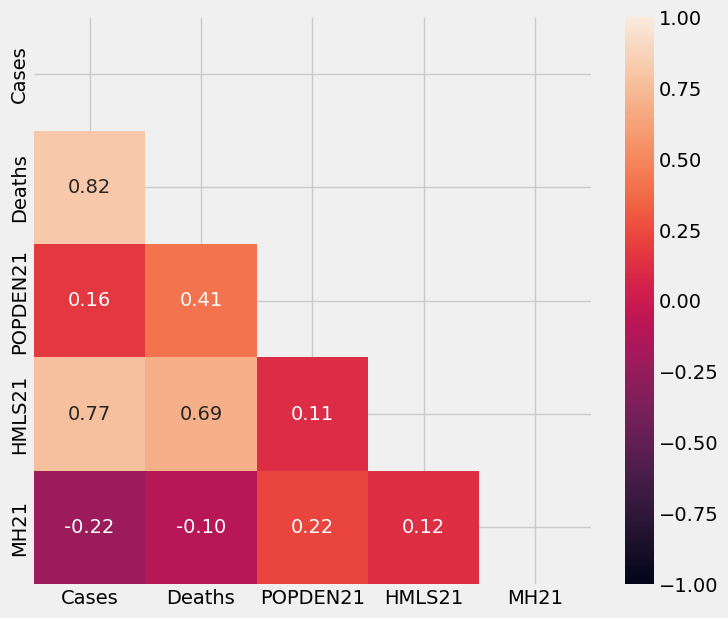

In [51]:
selected_columns = ['Cases', 'Deaths', 'POPDEN21', 'HMLS21', 'MH21']

# Scale dữ liệu
scaled_data = merged_data[selected_columns].copy()
scaled_data = (scaled_data - scaled_data.mean()) / scaled_data.std()

def pearson_coef(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    return np.sum((x-x_mean)*(y-y_mean))/(np.sqrt(np.sum((x-x_mean)**2))*np.sqrt(np.sum((y-y_mean)**2)))

fig, ax = plt.subplots(figsize=(8, 7))
corr = np.full((len(selected_columns), len(selected_columns)), fill_value=np.nan)
for i in range(1, 5):
    for j in range(i+1, 6):
        x = scaled_data[selected_columns[i-1]]
        y = scaled_data[selected_columns[j-1]]
        corr[j-1, i-1] = pearson_coef(x, y)
heat_map = sns.heatmap(corr, annot=True, fmt=".2f", vmax=1, vmin=-1, xticklabels=selected_columns, yticklabels=selected_columns)
plt.show()

**Nhận xét:**
- Quan sát ma trận hệ số tương quan giữa các biến, ta thấy rằng `Cases` và `Deaths` có hệ số tương quan dương cao với `HMLS21` (0.77 và 0.69). Điều này cho thấy rằng số ca nhiễm và tử vong có mối tương quan dương cao với số người vô gia cư. Điều này là dễ hiểu vì người vô gia cư thường không có điều kiện để bảo vệ bản thân khỏi dịch bệnh, họ dễ tiếp xúc với nhiều người khác và không có điều kiện để chăm sóc sức khỏe của mình.
- Trong khi đó mật độ dân cư cũng có hệ số tương quan dương với cả `Cases` và `Deaths`, tuy nhiên thấp hơn so với đặc trưng số lượng người vô gia cư. Điều này chứng tỏ mật độ dân cư càng cao thì số ca tử vong càng nhiều, số ca dương tính cũng tăng nhưng thực sự số ca dương tính không bị ảnh hưởng quá nhiều bởi mật độ dân cư.
- Cuối cùng là số lượng chuyên gia sức khỏe tâm thần, ta thấy rằng đặc trưng này có mối tương quan âm với cả `Deaths` và `Cases`. Điều này là dễ hiểu vì số lượng chuyên gia sức khỏe tâm thần càng nhiều thì sẽ giúp giảm căng thẳng và lo lắng của người dân, từ đó giúp họ tuân thủ tốt hơn các biện pháp phòng chống dịch bệnh. Đây có thể là một trong những yếu tố quan trọng giúp giảm đi sự ảnh hưởng nặng nề do dịch COVID-19 gây ra tại Mỹ.

##### 6.7 Tổng kết

***Đối với mật độ dân cư (DENPOP21)***
- Dựa theo những phân tích trên ta có thể thấy rằng mật độ dân cư cao không phải là một yếu tố chính tác động đến sự lây nhiễm của Covid-19. Mặc dù biểu đồ trực quan cho chúng ta một sự cảm nhận định tính cũng như các kiến thức về xã hội của chúng ta đều khiến chúng ta cảm nhận rằng nơi càng đông dân thì khả năng lây nhiễm càng cao. Tuy nhiên khi phân tích kĩ mô hình hồi quy thì ta có thể thấy điều đó là hoàn toàn sai. Điều này cũng hoàn toàn trùng khớp với kết luận của bài phân tích [Are high-density districts more vulnerable to the COVID-19 pandemic?](https://www.sciencedirect.com/science/article/pii/S2210670721001992#sec0045 ). Bài báo lí giải rằng mặc dù mật độ cao hơn có thể góp phần làm tăng các mối liên hệ xã hội chặt chẽ trong hoàn cảnh bình thường, nhưng điều này không phải lúc nào cũng đúng trong thời kỳ khủng hoảng. Do đó, người dân ở các bang mặc dù có mật độ dân số cao, nhưng đồng thời họ cũng tiếp cận tốt hơn và hiệu quả hơn với cơ sở hạ tầng và dịch vụ đô thị, do đó có thể sống an toàn khi dịch bệnh xảy ra, miễn là họ thực hiện tốt các chính sách giản cách xã hội. Do đó, các khu vực đô thị và khu đông dân cư cũng có thể an toàn trong đại dịch, cho nên chỉ riêng mật độ không thể được coi là yếu tố rủi ro lớn đối với sự lây lan COVID-19 mà phải xét đến nhiều yếu tố khác.
- Tuy nhiên với tình hình tử vong thì lại khác, mật độ dân cư lớn góp đóng góp lớn trong việc làm tăng số ca tử vong. Lí giải cho việc này ta có thể hiểu rằng, đối với các ca nhiễm mà có khả năng tử vong thì lúc mắc bệnh đa phần là chuyển biến nặng hơn các ca khác và cần điều trị ở cơ quan y tế chứ không thể tự cách ly tại nhà. Mật độ dân số đông tạo nên áp lực cho hệ thống y tế tại địa phương khiến cho khó khăn trong việc điều chu đáo cho từng người khiến cho người dân bị thiếu sự nguồn tài nguyên dẫn đến bệnh tình trở nặng và dẫn đến tử vong.

***Đối với số lượng người vô gia cư (HMLS21)***
- Yếu tố này đều hưởng lớn đến cả số ca nhiễm lẫn tử vong. Điều này cũng là hiển nhiên bởi như chúng ta đã đề cập ở trên thì việc giản cách xã hội là một trong các yếu tố tiên quyết để đẩy lùi đại dịch. Nhưng đối với những người vô gia cư thì lại khó có thể kiểm soát được điều đó, họ không có nhà, thiếu điều kiện về y tế như khẩu trang, không được tuyên truyền đúng cách dẫn đến việc khiến dịch bệnh lây lan rất nhiều trong cộng đồng những người vô gia cư tại khu vực cũng như lây sang cho các đối tượng khác. Và một khi đã mắc bệnh thì họ cũng khó tiếp cận được với các điều kiện y tế tiên tiến cho nên khả năng sóng sót là rất thấp

***Đối với số lượng chuyên gia tâm lí (MH21)***
- Yếu tố này đều hưởng lớn đến cả số ca nhiễm lẫn tử vong. Điều này khá đúng so với những gì chúng ta nhận xét được từ biểu đồ trực quan. Những nơi có nhiều chuyên gia tâm lí thì sức khỏe tinh thần của người dân được chăm sóc tốt hơn do sự hỗ trợ tinh thần từ các chuyên gia giúp giảm căng thẳng và lo lắng của người dân, từ đó giúp họ tuân thủ tốt hơn các biện pháp phòng chống dịch bệnh. Điều này cũng đúng với thông tin mà [Viện Y học Quốc gia Hoa Kỳ (National Institutes of Health - NIH)](https://covid19.nih.gov/covid-19-topics/mental-health#mental-health-during-the-covid19-pandemic-1) kết luận về sức khỏe tinh thần ảnh hưởng thế nào đối với COVID-19. Cụ thể họ cho rằng những người mắc bệnh hoặc rối loạn tâm thần và sau đó nhiễm COVID-19 có nhiều khả năng tử vong hơn những người không mắc bệnh hoặc rối loạn tâm thần. Sức khỏe tâm thần là trọng tâm nghiên cứu của NIH trong đại dịch COVID-19.

### 7. Tổng kết


Qua quá trình phân tích trên, ta có thể rút ra được các kết luận cho mỗi yếu tố ảnh hưởng đến sự lây nhiễm và tử vong của COVID-19 tại Mỹ như sau:
- Tình hình COVID-19 tại Mỹ trong giai đoạn 2020-2021 diễn biến phức tạp và căng thẳng, với số ca nhiễm và tử vong tăng mạnh. Chỉ đến tháng 3/2021 thì mọi thứ mới bắt đầu giảm xuống nhưng vẫn còn cao so với những ngày đầu bùng phát. Điều này cho thấy rằng việc kiểm soát dịch bệnh tại Mỹ chưa thực sự hiệu quả và chậm trễ.
- Về chủng tộc, Mỹ là một quốc gia đa dạng về chủng tộc, chính vì vậy sự ảnh hưởng của COVID-19 tới các nhóm chủng tộc cũng khác nhau. Nhóm người da trắng bị ảnh hưởng nặng nề nhất về số ca nhiễm và tử vong so với các chủng tộc da màu khác (hay còn gọi là `POCs`). Còn trong nhóm chủng tộc POCs thì người da Mỹ gốc Phi `Black` và người `Latinx` bị ảnh hưởng nặng nề nhất so với các chủng tộc da màu còn lại. Tuy nhiên ở đây ta chỉ biết được tổng số ca nhiễm và tử vong chứ không nắm rõ con số ấy chiếm bao nhiêu phần trăm trong dân số nên không thể kết luận rằng chủng tộc nào bị ảnh hưởng nặng nề nhất. Nhưng dựa vào những thông tin trên ta có thể thấy rằng chính sách phòng chống dịch bệnh của Mỹ chưa thực sự hiệu quả đối với cả nhóm chủng tộc da trắng lẫn các nhóm chủng tộc da màu khác.
- Đối với các chính sách xã hội thì ta cũng thấy được chính quyền ở Mỹ cũng rất khẩn trương ban hành nhiều chính sách cách ly nhằm kiểm hãm sự lan tỏa dịch bệnh, tuy nhiên sự hiệu quả đem lại thì không quá đáng kể. Trong các chính sách thì chỉ có chính sách đóng cửa nhà hàng và chỉ cho phép mua về là có ảnh hưởng lớn nhất so với các chính sách còn lại. Tóm lại thì trong thời kì căng thẳng nhất của đại dịch COVID-19, các bang khắp nước Mỹ đã rất nỗ lực để ban hành nhiều chính sách kiểm soát dịch bệnh nhưng hiệu quả thì vẫn rất thấp, số ca nhiễm và tử vong vẫn tăng mạnh mặc dù đôi lúc có giảm nhưng không đáng kể, điều này cho thấy rằng rất có thể việc quản lý và yêu cầu người dân tuân thủ các chính sách diễn ra chưa được hiệu quả cũng như người dân ở đây vẫn chưa thực sự chú trọng đến việc tuân thủ các chính sách phòng chống dịch bệnh.
- Còn về yếu tố con người, số lượng người vô gia cư và số chuyên gia tâm lý có ở mỗi bang tác động rất lớn đến số ca nhiễm và tử vong bởi COVID-19, tuy nhiên cách chúng ảnh hưởng lại trái nghịch nhau. Trong khi số lượng người vô gia càng lớn thì càng ảnh hưởng tiêu cực thì số chuyên gia tâm lý lại làm điều ngược lại. Điều này là hoàn toàn hợp lí vì như đã phân tích ở trên, người vô gia cư thường không có điều kiện để bảo vệ bản thân khỏi dịch bệnh, họ dễ tiếp xúc với nhiều người khác và không có điều kiện để chăm sóc sức khỏe của mình. Trong khi đó số lượng chuyên gia sức khỏe tâm thần càng nhiều thì sẽ giúp giảm căng thẳng và lo lắng của người dân, từ đó giúp họ tuân thủ tốt hơn các biện pháp phòng chống dịch bệnh. Cuối cùng là mật độ dân số cũng ảnh hưởng ít nhiều đến số ca nhiễm và tử vong. Cụ thể, mật độ dân cư càng cao thì số ca tử vong càng nhiều, số ca dương tính cũng tăng nhưng thực sự số ca dương tính không bị ảnh hưởng quá nhiều bởi mật độ dân cư.

---
<p style="text-align:center; font-size:30px;">END</p>